In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
malgenome_all = pd.read_csv('malgenome.csv')

In [3]:
#dataset load
malgenome_apis_permissions = pd.read_csv('malgenome.csv', 
                         usecols= [*range(0, 5),6,*range(8, 11),12,14,*range(17, 20),
                                  21,22,24,*range(26,33),35,37,40,41,45,46,50,52,54,
                                  57,60,65,69,*range(73,76),85,90,94,97,98,101,104,
                                  110,114,120,131,138,140,146,155,156,161,165,166,
                                  168,172,176,186,188,193,194,198,201,206,215,
                                  5,7,13,15,16,23,25,33,34,38,39,42,43,47,48,49,51,
                                   55,58,61,64,66,67,68,72,*range(76, 85),86,
                                  89,92,96,99,100,103,*range(105,110),111,112,
                                  116,118,119,*range(121,126),127,129,130,
                                  *range(132,138),139,142,143,144,*range(147,155),
                                  158,162,163,164,167,169,170,171,173,174,175,178,
                                  *range(180,186),187,*range(189,193),195,199,
                                  200,202,204,205,*range(207,214)])

In [4]:
malgenome_all.shape

(3799, 216)

In [5]:
malgenome_apis_permissions.shape

(3799, 183)

In [6]:
X_all = malgenome_all.iloc[0:,0:215]  #independent columns
y_all = malgenome_all.iloc[0:,-1]
X_all["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X_all['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [7]:
X_apis_permissions = malgenome_apis_permissions.iloc[0:,0:182]  #independent columns
X_apis_permissions["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X_apis_permissions['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [8]:
X_apis_permissions.head()

transact  bindService  onServiceConnected  ServiceConnection  \
0         0            0                   0                  0   
1         0            0                   0                  0   
2         0            0                   0                  0   
3         0            0                   0                  0   
4         1            1                   1                  1   

   android.os.Binder  READ_SMS  attachInterface  WRITE_SMS  \
0                  0         0                0          0   
1                  0         1                0          0   
2                  0         0                0          0   
3                  0         1                0          1   
4                  1         1                1          1   

   TelephonyManager.getSubscriberId  Ljava.lang.Class.getCanonicalName  ...  \
0                                 0                                  0  ...   
1                                 1                                  0  ...   
2                                 0                                  0  ...   
3                                 1                                  0  ...   
4                                 1                                  1  ...   

   READ_INPUT_STATE  READ_EXTERNAL_STORAGE  Ljava.lang.Object.getClass  \
0                 0                      0                           1   
1                 0                      0                           1   
2                 0                      0                           0   
3                 0                      0                           1   
4                 0                      0                           1   

   SET_ORIENTATION  DEVICE_POWER  EXPAND_STATUS_BAR  GET_TASKS  GLOBAL_SEARCH  \
0                0             0                  0          0              0   
1                0             0                  0          0              0   
2                0             0                  0          0              0   
3                0             0                  0          0              0   
4                0             1                  0          0              0   

   GET_PACKAGE_SIZE  SET_PREFERRED_APPLICATIONS  
0                 0                           0  
1                 0                           0  
2                 0                           0  
3                 0                           0  
4                 0                           0  

[5 rows x 182 columns]

In [9]:
y_all = y_all.map(dict(S=1, B=0))

In [10]:
y_all

0       1
1       1
2       1
3       1
4       1
       ..
3794    0
3795    0
3796    0
3797    0
3798    0
Name: class, Length: 3799, dtype: int64

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_apis_permissions, y_all, test_size = 0.5, random_state = 0)


In [12]:
#mandatory import 
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


from sklearn.feature_selection import RFE

In [13]:
with_corr=[]
without_corr=[]
pre = []
rec = []
fs = []
acc = []
auc = []
def clear_metrics(): 
    with_corr.clear()
    without_corr.clear()
    pre.clear()
    rec.clear()
    fs.clear()
    acc.clear()
    auc.clear()

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

In [14]:
import csv, os, time 
def results_to_csv(title, corr=0):
    directory = "APIS_PERMISSIONS_CSV"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
    print(parent_dir)
    
#     if not parent_dir == 'Malgenome':
#         os.chdir('Malgenome')
#         parent_dir = os.getcwd()
#         print(parent_dir)
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_CSV'):
        os.mkdir(path)
    os.chdir(path) 
    print(1)
    with open(title+ '.csv', 'w') as f:
        writer = csv.writer(f)
        if corr==1: 
            writer.writerow(['Without Correlation', 'With Correlation','Accuracy','Precision', 'Recall', 'F1','AUC'])
            writer.writerows(zip(without_corr, with_corr, acc, pre, rec, fs, auc))
            print(without_corr, with_corr, acc, pre, rec, fs, auc)
        else: 
            writer.writerow(['Accuracy','Precision', 'Recall', 'F1','AUC'])
            
            writer.writerows(zip(acc, pre, rec, fs, auc))
    os.chdir('../')
        
def allscore(scores,i,with_correlation=0):
    without_corr.insert(i,i)
    if with_correlation!=0:
        with_corr.insert(i,with_correlation)
    acc.insert(i,scores['test_accuracy'].mean())
    fs.insert(i,scores['test_f1'].mean())
    pre.insert(i,scores['test_precision'].mean())
    rec.insert(i,scores['test_recall'].mean())
    auc.insert(i,scores['test_roc_auc'].mean())
    print("Accuracy: %0.4f   (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.4f   (+/- %0.4f)" % (scores['test_precision'].mean(), scores['test_accuracy'].std() * 2))
    print("Recall: %0.4f   (+/- %0.4f)" % (scores['test_recall'].mean(), scores['test_accuracy'].std() * 2))
    print("F-1 Score: %0.4f   (+/- %0.4f)" % (scores['test_f1'].mean(), scores['test_accuracy'].std() * 2))
    print("ROC-AUC: %0.4f   (+/- %0.4f)" % (scores['test_roc_auc'].mean(), scores['test_accuracy'].std() * 2))
def run_randomForest(X,y, i=0, with_corr=0):
    scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
    print('Classification Report for Random Forest:   ', i)
    allscore(scores,i,with_corr)
def incremental_plot(i,j,title, x_axis = "Number of Features"): 
    from pylab import rcParams
    %matplotlib inline 
    rcParams['figure.figsize'] = 10,8
    sns.set_style('whitegrid')
    x = range(i,j)
    y1 = pre
    y2 = rec
    y3 = acc
    y4 = fs

    fig = plt.figure()
    ax = plt.subplot(111)
    #savefig('f.png', bbox_inches='tight')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel("Performance Metrics")
    ax.plot(x,y1, mew = 1, label='Precision') #mew = marker width
    ax.plot(x,y2,  mew = 1, label='Recall') #mew = marker width
    ax.plot(x,y3,  mew = 1, label='Accuracy') #mew = marker width
    ax.plot(x,y4, mew = 1, label='F-1 Score') #mew = marker width
    ax.legend(loc='upper center', bbox_to_anchor=(1.12, 0.6), shadow=True, prop={'size': 15}, ncol=1)
    #plt.plot(x1,y1, marker = '+', mew = 10)
    directory = "APIS_PERMISSIONS_FIGURES"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_FIGURES'):
        os.mkdir(path)
    os.chdir(path) 
    plt.savefig(title + '.png', bbox_inches='tight', pad_inches=.1)
    os.chdir('../')
    
def incremental_plot_auc(i,j,title, x_axis = "Number of Features"): 
    from pylab import rcParams
    %matplotlib inline 
    rcParams['figure.figsize'] = 10,8
    sns.set_style('whitegrid')
    x = range(i,j)
    y1 = auc
 

    fig = plt.figure()
    ax = plt.subplot(111)
    #savefig('f.png', bbox_inches='tight')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel("ROC-AUC Score")
    ax.plot(x,y1, mew = 1, label='ROC-AUC') #mew = marker width
    ax.legend(loc='upper center', bbox_to_anchor=(1.12, 0.6), shadow=True, prop={'size': 15}, ncol=1)
    #plt.plot(x1,y1, marker = '+', mew = 10)
    directory = "APIS_PERMISSIONS_FIGURES"
  
    # Parent Directory path 
    parent_dir = os.getcwd()
  
    # Path 
    path = os.path.join(parent_dir, directory) 
    if not os.path.exists('APIS_PERMISSIONS_FIGURES'):
        os.mkdir(path)
    os.chdir(path) 
    plt.savefig(title + '_AUC.png', bbox_inches='tight', pad_inches=.1)
    os.chdir('../')
    
    
    

In [15]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col
def grouped_correlated(X):
    corr_features = get_correlation(X, 0.8)
    #print(corr_features)
    X_uncorrelated = X.drop(labels = corr_features, axis =1)
    corrmat = X.corr()
    corrdata = corrmat.abs().stack()
    corrdata = corrdata.sort_values(ascending=False)
    corrdata = corrdata[corrdata>0.8]
    corrdata = corrdata[corrdata<1]
    corrdata = pd.DataFrame(corrdata).reset_index()
    corrdata.columns = ['features1', 'features2', 'corr_value']
    #print(corrdata)
    
   
    top_corr_features = corrmat.index
#     #plt.figure(figsize=(24,24))
#     #plot heat map
#     #g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#     bottom, top = g.get_ylim()
#     g.set_ylim(bottom + 0.5, top - 0.5)
#     #figure = g.get_figure()    
#     figure.savefig('Correlation', dpi=400, bbox_inches='tight', pad_inches=.1)
    grouped_feature_list = []
    correlated_groups_list = []
    for feature in corrdata.features1.unique():
        if feature not in grouped_feature_list:
            correlated_block = corrdata[corrdata.features1 == feature]
            grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
            correlated_groups_list.append(correlated_block)
    #Feature Importance based on tree based classifiers 

    important_features = []
    for group in correlated_groups_list:
        features = list(group.features1.unique()) + list(group.features2.unique())
        rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)
        rf.fit(X[features], y_validate)

        importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
        importance.columns = ['features', 'importance']
        importance.sort_values(by = 'importance', ascending = False, inplace = True)
        feat = importance.iloc[0]
        important_features.append(feat)
    important_features= pd.DataFrame(important_features)
    important_features.reset_index(inplace=True, drop = True)
    important_features
    features_to_consider = set(important_features['features'])
    features_to_discard = set(corr_features) - set(features_to_consider)
    features_to_discard = list(features_to_discard)
    X_grouped_correlated = X.drop(labels = features_to_discard, axis = 1)
    print (X_grouped_correlated.shape)
    return X_grouped_correlated
def to_dataframe(X):
    print(X.shape)
    X_return = pd.DataFrame(data=X,
          index=np.arange(1, X.shape[0]+1), columns=np.arange(1, X.shape[1]+1))
    
    return X_return

## Feature Importance using SelectKBest, chi2, f-score

In [46]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [47]:
clear_metrics()
#X_top_feat_imps
for index in range(1,184,1):
    top_permissions_indexes = []
    top_permissions_indexes = featureScores.Score.nlargest(index).index
    X_top_feat_imps = X_validate.iloc[0:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7745   (+/- 0.0397)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8300   (+/- 0.0411)
Precision: 0.9322   (+/- 0.0411)
Recall: 0.5562   (+/- 0.0411)
F-1 Score: 0.6954   (+/- 0.0411)
ROC-AUC: 0.8093   (+/- 0.0411)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8337   (+/- 0.0565)
Precision: 0.8630   (+/- 0.0565)
Recall: 0.6254   (+/- 0.0565)
F-1 Score: 0.7242   (+/- 0.0565)
ROC-AUC: 0.8282   (+/- 0.0565)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8353   (+/- 0.0494)
Precision: 0.8551   (+/- 0.0494)
Recall: 0.6390   (+

Classification Report for Random Forest:    39
Accuracy: 0.9753   (+/- 0.0183)
Precision: 0.9689   (+/- 0.0183)
Recall: 0.9609   (+/- 0.0183)
F-1 Score: 0.9644   (+/- 0.0183)
ROC-AUC: 0.9953   (+/- 0.0183)
(1900, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9789   (+/- 0.0216)
Precision: 0.9734   (+/- 0.0216)
Recall: 0.9669   (+/- 0.0216)
F-1 Score: 0.9698   (+/- 0.0216)
ROC-AUC: 0.9954   (+/- 0.0216)
(1900, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9784   (+/- 0.0202)
Precision: 0.9733   (+/- 0.0202)
Recall: 0.9654   (+/- 0.0202)
F-1 Score: 0.9689   (+/- 0.0202)
ROC-AUC: 0.9956   (+/- 0.0202)
(1900, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9784   (+/- 0.0213)
Precision: 0.9735   (+/- 0.0213)
Recall: 0.9654   (+/- 0.0213)
F-1 Score: 0.9690   (+/- 0.0213)
ROC-AUC: 0.9956   (+/- 0.0213)
(1900, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9805   (+/- 0.0176)
Precision: 0.9778   (+/- 0.0176)
Recall: 0.9669   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9805   (+/- 0.0189)
Precision: 0.9820   (+/- 0.0189)
Recall: 0.9623   (+/- 0.0189)
F-1 Score: 0.9717   (+/- 0.0189)
ROC-AUC: 0.9948   (+/- 0.0189)
(1900, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9811   (+/- 0.0189)
Precision: 0.9803   (+/- 0.0189)
Recall: 0.9654   (+/- 0.0189)
F-1 Score: 0.9725   (+/- 0.0189)
ROC-AUC: 0.9950   (+/- 0.0189)
(1900, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9832   (+/- 0.0193)
Precision: 0.9833   (+/- 0.0193)
Recall: 0.9684   (+/- 0.0193)
F-1 Score: 0.9757   (+/- 0.0193)
ROC-AUC: 0.9950   (+/- 0.0193)
(1900, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9805   (+/- 0.0163)
Precision: 0.9775   (+/- 0.0163)
Recall: 0.9669   (+/- 0.0163)
F-1 Score: 0.9719   (+/- 0.0163)
ROC-AUC: 0.9947   (+/- 0.0163)
(1900, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9805   (+/- 0.0194)
Precision: 0.9789   (+/- 0.0194)
Recall: 0.9654   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9826   (+/- 0.0231)
Precision: 0.9864   (+/- 0.0231)
Recall: 0.9639   (+/- 0.0231)
F-1 Score: 0.9746   (+/- 0.0231)
ROC-AUC: 0.9974   (+/- 0.0231)
(1900, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9795   (+/- 0.0228)
Precision: 0.9791   (+/- 0.0228)
Recall: 0.9624   (+/- 0.0228)
F-1 Score: 0.9704   (+/- 0.0228)
ROC-AUC: 0.9972   (+/- 0.0228)
(1900, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9832   (+/- 0.0239)
Precision: 0.9834   (+/- 0.0239)
Recall: 0.9684   (+/- 0.0239)
F-1 Score: 0.9756   (+/- 0.0239)
ROC-AUC: 0.9975   (+/- 0.0239)
(1900, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9842   (+/- 0.0188)
Precision: 0.9880   (+/- 0.0188)
Recall: 0.9669   (+/- 0.0188)
F-1 Score: 0.9771   (+/- 0.0188)
ROC-AUC: 0.9975   (+/- 0.0188)
(1900, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9847   (+/- 0.0159)
Precision: 0.9835   (+/- 0.0159)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9821   (+/- 0.0195)
Precision: 0.9833   (+/- 0.0195)
Recall: 0.9654   (+/- 0.0195)
F-1 Score: 0.9740   (+/- 0.0195)
ROC-AUC: 0.9972   (+/- 0.0195)
(1900, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9832   (+/- 0.0181)
Precision: 0.9865   (+/- 0.0181)
Recall: 0.9654   (+/- 0.0181)
F-1 Score: 0.9755   (+/- 0.0181)
ROC-AUC: 0.9971   (+/- 0.0181)
(1900, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9805   (+/- 0.0240)
Precision: 0.9834   (+/- 0.0240)
Recall: 0.9609   (+/- 0.0240)
F-1 Score: 0.9716   (+/- 0.0240)
ROC-AUC: 0.9971   (+/- 0.0240)
(1900, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9816   (+/- 0.0227)
Precision: 0.9819   (+/- 0.0227)
Recall: 0.9654   (+/- 0.0227)
F-1 Score: 0.9733   (+/- 0.0227)
ROC-AUC: 0.9970   (+/- 0.0227)
(1900, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9837   (+/- 0.0179)
Precision: 0.9835   (+/- 0.0179)
Recall: 0.9

In [48]:
title = "Feature Selection using SelectKBest(Chi-Square Test)"
results_to_csv(title)

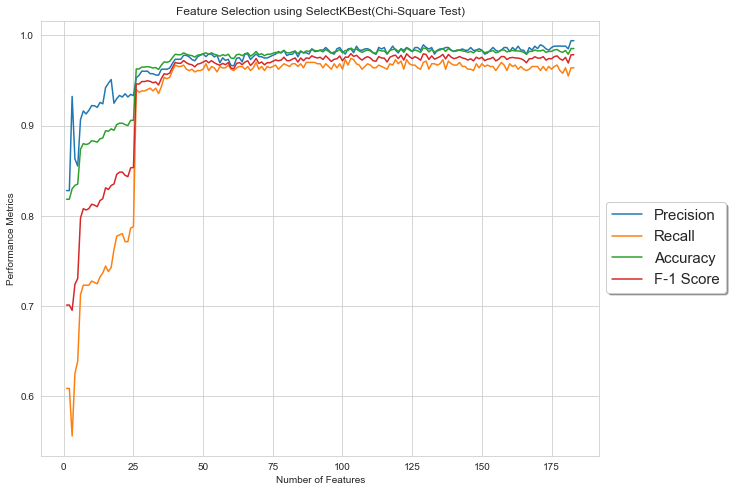

In [49]:
incremental_plot(1,184,title)

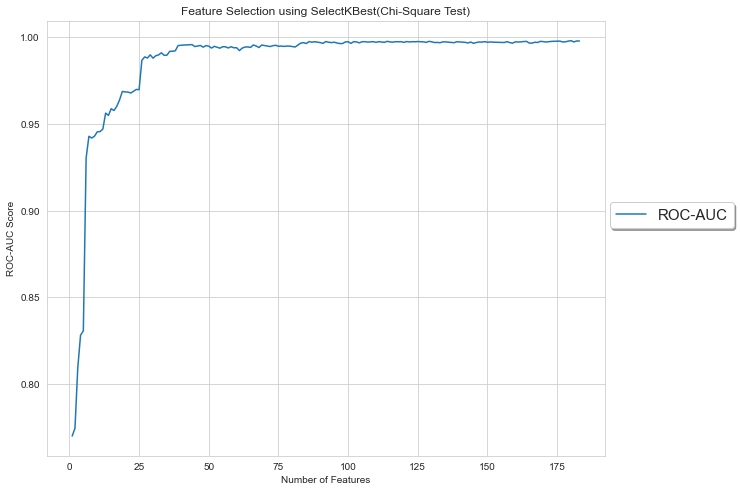

In [50]:
incremental_plot_auc(1,184,title)

In [51]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [64]:
featureScores.Score.nlargest(5).index

Int64Index([0, 1, 3, 2, 4], dtype='int64')

In [52]:
clear_metrics()
#X_top_feat_imps
for index in range(1,184,1):
    top_permissions_indexes = []
    top_permissions_indexes = featureScores.Score.nlargest(index).index
    X_top_feat_imps = X_validate.iloc[0:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7745   (+/- 0.0397)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8300   (+/- 0.0411)
Precision: 0.9322   (+/- 0.0411)
Recall: 0.5562   (+/- 0.0411)
F-1 Score: 0.6954   (+/- 0.0411)
ROC-AUC: 0.8093   (+/- 0.0411)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8568   (+/- 0.0446)
Precision: 0.8936   (+/- 0.0446)
Recall: 0.6722   (+/- 0.0446)
F-1 Score: 0.7655   (+/- 0.0446)
ROC-AUC: 0.9140   (+/- 0.0446)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8632   (+/- 0.0408)
Precision: 0.8973   (+/- 0.0408)
Recall: 0.6888   (+

Classification Report for Random Forest:    39
Accuracy: 0.9737   (+/- 0.0245)
Precision: 0.9712   (+/- 0.0245)
Recall: 0.9533   (+/- 0.0245)
F-1 Score: 0.9619   (+/- 0.0245)
ROC-AUC: 0.9940   (+/- 0.0245)
(1900, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9737   (+/- 0.0279)
Precision: 0.9695   (+/- 0.0279)
Recall: 0.9548   (+/- 0.0279)
F-1 Score: 0.9619   (+/- 0.0279)
ROC-AUC: 0.9940   (+/- 0.0279)
(1900, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9705   (+/- 0.0236)
Precision: 0.9637   (+/- 0.0236)
Recall: 0.9519   (+/- 0.0236)
F-1 Score: 0.9575   (+/- 0.0236)
ROC-AUC: 0.9942   (+/- 0.0236)
(1900, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9721   (+/- 0.0254)
Precision: 0.9654   (+/- 0.0254)
Recall: 0.9548   (+/- 0.0254)
F-1 Score: 0.9597   (+/- 0.0254)
ROC-AUC: 0.9941   (+/- 0.0254)
(1900, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9732   (+/- 0.0223)
Precision: 0.9656   (+/- 0.0223)
Recall: 0.9579   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9795   (+/- 0.0185)
Precision: 0.9730   (+/- 0.0185)
Recall: 0.9684   (+/- 0.0185)
F-1 Score: 0.9706   (+/- 0.0185)
ROC-AUC: 0.9973   (+/- 0.0185)
(1900, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9832   (+/- 0.0193)
Precision: 0.9819   (+/- 0.0193)
Recall: 0.9700   (+/- 0.0193)
F-1 Score: 0.9758   (+/- 0.0193)
ROC-AUC: 0.9969   (+/- 0.0193)
(1900, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9816   (+/- 0.0171)
Precision: 0.9805   (+/- 0.0171)
Recall: 0.9669   (+/- 0.0171)
F-1 Score: 0.9734   (+/- 0.0171)
ROC-AUC: 0.9973   (+/- 0.0171)
(1900, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9800   (+/- 0.0155)
Precision: 0.9804   (+/- 0.0155)
Recall: 0.9624   (+/- 0.0155)
F-1 Score: 0.9711   (+/- 0.0155)
ROC-AUC: 0.9969   (+/- 0.0155)
(1900, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9816   (+/- 0.0184)
Precision: 0.9802   (+/- 0.0184)
Recall: 0.9669   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9826   (+/- 0.0176)
Precision: 0.9835   (+/- 0.0176)
Recall: 0.9669   (+/- 0.0176)
F-1 Score: 0.9749   (+/- 0.0176)
ROC-AUC: 0.9972   (+/- 0.0176)
(1900, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9816   (+/- 0.0217)
Precision: 0.9834   (+/- 0.0217)
Recall: 0.9639   (+/- 0.0217)
F-1 Score: 0.9733   (+/- 0.0217)
ROC-AUC: 0.9973   (+/- 0.0217)
(1900, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9821   (+/- 0.0222)
Precision: 0.9834   (+/- 0.0222)
Recall: 0.9654   (+/- 0.0222)
F-1 Score: 0.9740   (+/- 0.0222)
ROC-AUC: 0.9972   (+/- 0.0222)
(1900, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9821   (+/- 0.0222)
Precision: 0.9847   (+/- 0.0222)
Recall: 0.9639   (+/- 0.0222)
F-1 Score: 0.9740   (+/- 0.0222)
ROC-AUC: 0.9971   (+/- 0.0222)
(1900, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9853   (+/- 0.0193)
Precision: 0.9879   (+/- 0.0193)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9811   (+/- 0.0222)
Precision: 0.9834   (+/- 0.0222)
Recall: 0.9624   (+/- 0.0222)
F-1 Score: 0.9725   (+/- 0.0222)
ROC-AUC: 0.9970   (+/- 0.0222)
(1900, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9842   (+/- 0.0182)
Precision: 0.9851   (+/- 0.0182)
Recall: 0.9699   (+/- 0.0182)
F-1 Score: 0.9771   (+/- 0.0182)
ROC-AUC: 0.9972   (+/- 0.0182)
(1900, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9816   (+/- 0.0171)
Precision: 0.9820   (+/- 0.0171)
Recall: 0.9654   (+/- 0.0171)
F-1 Score: 0.9733   (+/- 0.0171)
ROC-AUC: 0.9974   (+/- 0.0171)
(1900, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9821   (+/- 0.0158)
Precision: 0.9834   (+/- 0.0158)
Recall: 0.9654   (+/- 0.0158)
F-1 Score: 0.9741   (+/- 0.0158)
ROC-AUC: 0.9974   (+/- 0.0158)
(1900, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9842   (+/- 0.0149)
Precision: 0.9834   (+/- 0.0149)
Recall: 0.9

In [53]:
title = "Feature Selection using SelectKBest(ANOVA F-value)"
results_to_csv(title)

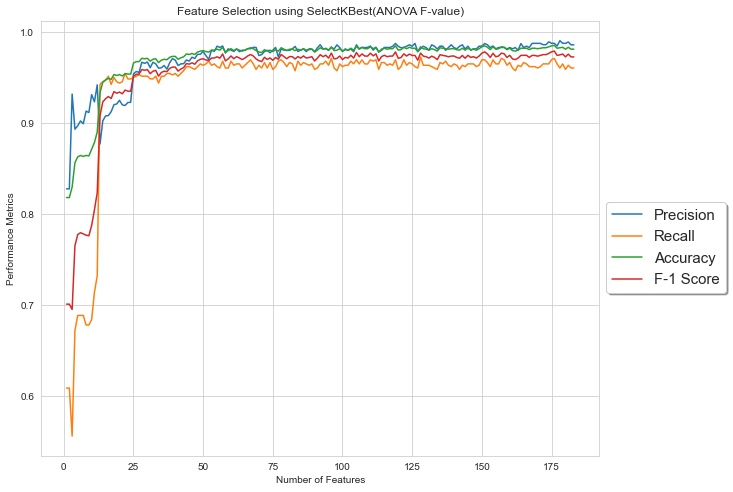

In [54]:
incremental_plot(1,184,title)

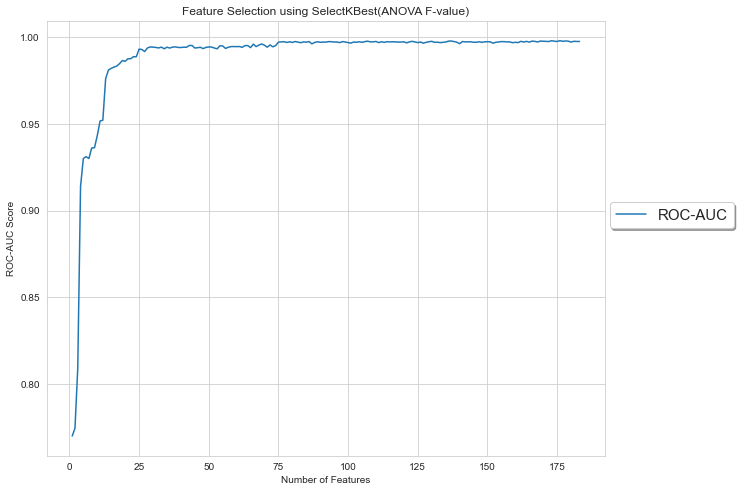

In [55]:
incremental_plot_auc(1,184,title)

In [42]:
X_top_feat_imps.shape

(7518, 186)

## Feature Importance (feature_importances_)

In [56]:
#RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_validate.columns)

In [57]:
clear_metrics()
#X_top_feat_imps
for index in range(1,184,1):
    top_permissions_indexes = []
    top_permissions_indexes = feat_importances.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.8368   (+/- 0.0216)
Precision: 0.9528   (+/- 0.0216)
Recall: 0.5623   (+/- 0.0216)
F-1 Score: 0.7063   (+/- 0.0216)
ROC-AUC: 0.8940   (+/- 0.0216)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8589   (+/- 0.0404)
Precision: 0.8843   (+/- 0.0404)
Recall: 0.6872   (+/- 0.0404)
F-1 Score: 0.7725   (+/- 0.0404)
ROC-AUC: 0.9167   (+/- 0.0404)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8568   (+/- 0.0446)
Precision: 0.8936   (+/- 0.0446)
Recall: 0.6722   (+/- 0.0446)
F-1 Score: 0.7655   (+/- 0.0446)
ROC-AUC: 0.9140   (+/- 0.0446)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.9042   (+/- 0.0373)
Precision: 0.8632   (+/- 0.0373)
Recall: 0.8677   (+

Classification Report for Random Forest:    39
Accuracy: 0.9795   (+/- 0.0208)
Precision: 0.9751   (+/- 0.0208)
Recall: 0.9669   (+/- 0.0208)
F-1 Score: 0.9706   (+/- 0.0208)
ROC-AUC: 0.9975   (+/- 0.0208)
(1900, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9805   (+/- 0.0211)
Precision: 0.9736   (+/- 0.0211)
Recall: 0.9714   (+/- 0.0211)
F-1 Score: 0.9722   (+/- 0.0211)
ROC-AUC: 0.9967   (+/- 0.0211)
(1900, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9800   (+/- 0.0193)
Precision: 0.9735   (+/- 0.0193)
Recall: 0.9699   (+/- 0.0193)
F-1 Score: 0.9713   (+/- 0.0193)
ROC-AUC: 0.9974   (+/- 0.0193)
(1900, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9805   (+/- 0.0221)
Precision: 0.9793   (+/- 0.0221)
Recall: 0.9654   (+/- 0.0221)
F-1 Score: 0.9719   (+/- 0.0221)
ROC-AUC: 0.9968   (+/- 0.0221)
(1900, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9805   (+/- 0.0189)
Precision: 0.9806   (+/- 0.0189)
Recall: 0.9639   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9789   (+/- 0.0262)
Precision: 0.9834   (+/- 0.0262)
Recall: 0.9563   (+/- 0.0262)
F-1 Score: 0.9691   (+/- 0.0262)
ROC-AUC: 0.9977   (+/- 0.0262)
(1900, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9837   (+/- 0.0185)
Precision: 0.9882   (+/- 0.0185)
Recall: 0.9654   (+/- 0.0185)
F-1 Score: 0.9763   (+/- 0.0185)
ROC-AUC: 0.9977   (+/- 0.0185)
(1900, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9821   (+/- 0.0212)
Precision: 0.9911   (+/- 0.0212)
Recall: 0.9579   (+/- 0.0212)
F-1 Score: 0.9737   (+/- 0.0212)
ROC-AUC: 0.9979   (+/- 0.0212)
(1900, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9811   (+/- 0.0195)
Precision: 0.9850   (+/- 0.0195)
Recall: 0.9609   (+/- 0.0195)
F-1 Score: 0.9725   (+/- 0.0195)
ROC-AUC: 0.9979   (+/- 0.0195)
(1900, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9800   (+/- 0.0204)
Precision: 0.9849   (+/- 0.0204)
Recall: 0.9578   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9821   (+/- 0.0222)
Precision: 0.9909   (+/- 0.0222)
Recall: 0.9579   (+/- 0.0222)
F-1 Score: 0.9738   (+/- 0.0222)
ROC-AUC: 0.9976   (+/- 0.0222)
(1900, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9821   (+/- 0.0164)
Precision: 0.9880   (+/- 0.0164)
Recall: 0.9609   (+/- 0.0164)
F-1 Score: 0.9740   (+/- 0.0164)
ROC-AUC: 0.9979   (+/- 0.0164)
(1900, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9821   (+/- 0.0227)
Precision: 0.9909   (+/- 0.0227)
Recall: 0.9578   (+/- 0.0227)
F-1 Score: 0.9736   (+/- 0.0227)
ROC-AUC: 0.9980   (+/- 0.0227)
(1900, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9821   (+/- 0.0201)
Precision: 0.9865   (+/- 0.0201)
Recall: 0.9624   (+/- 0.0201)
F-1 Score: 0.9740   (+/- 0.0201)
ROC-AUC: 0.9978   (+/- 0.0201)
(1900, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9832   (+/- 0.0209)
Precision: 0.9895   (+/- 0.0209)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9832   (+/- 0.0187)
Precision: 0.9880   (+/- 0.0187)
Recall: 0.9639   (+/- 0.0187)
F-1 Score: 0.9755   (+/- 0.0187)
ROC-AUC: 0.9979   (+/- 0.0187)
(1900, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9826   (+/- 0.0189)
Precision: 0.9893   (+/- 0.0189)
Recall: 0.9609   (+/- 0.0189)
F-1 Score: 0.9747   (+/- 0.0189)
ROC-AUC: 0.9976   (+/- 0.0189)
(1900, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9837   (+/- 0.0191)
Precision: 0.9894   (+/- 0.0191)
Recall: 0.9639   (+/- 0.0191)
F-1 Score: 0.9763   (+/- 0.0191)
ROC-AUC: 0.9977   (+/- 0.0191)
(1900, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9811   (+/- 0.0227)
Precision: 0.9822   (+/- 0.0227)
Recall: 0.9639   (+/- 0.0227)
F-1 Score: 0.9726   (+/- 0.0227)
ROC-AUC: 0.9977   (+/- 0.0227)
(1900, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9821   (+/- 0.0184)
Precision: 0.9879   (+/- 0.0184)
Recall: 0.9

In [58]:
title = "Feature Selection using Random Forest Classifier - Feature Importances"
results_to_csv(title)

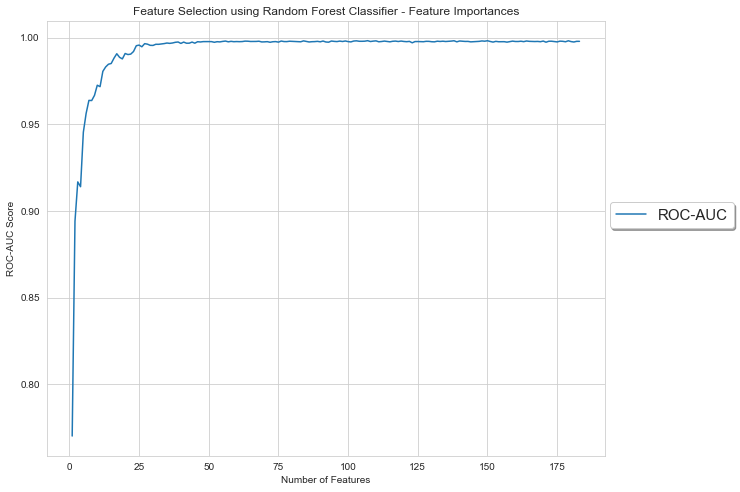

In [59]:
incremental_plot_auc(1,184, title)

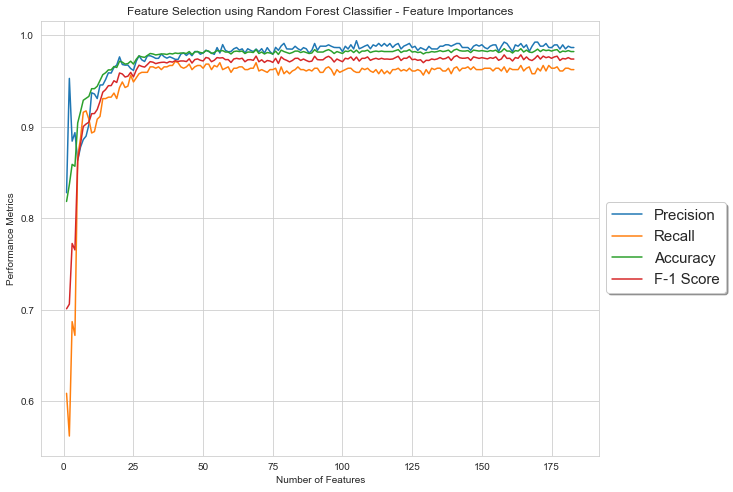

In [60]:
incremental_plot(1,184, title)


In [66]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [67]:
clear_metrics()
X_top_feat_imps
for index in range(1,184,1):
    top_permissions_indexes = []
    top_permissions_indexes = feat_importances.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.8441   (+/- 0.0397)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.8163   (+/- 0.0387)
Precision: 0.8267   (+/- 0.0387)
Recall: 0.6029   (+/- 0.0387)
F-1 Score: 0.6967   (+/- 0.0387)
ROC-AUC: 0.8479   (+/- 0.0387)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8321   (+/- 0.0357)
Precision: 0.9307   (+/- 0.0357)
Recall: 0.5637   (+/- 0.0357)
F-1 Score: 0.7009   (+/- 0.0357)
ROC-AUC: 0.8686   (+/- 0.0357)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8963   (+/- 0.0520)
Precision: 0.8170   (+/- 0.0520)
Recall: 0.9083   (+

Classification Report for Random Forest:    39
Accuracy: 0.9821   (+/- 0.0212)
Precision: 0.9808   (+/- 0.0212)
Recall: 0.9684   (+/- 0.0212)
F-1 Score: 0.9742   (+/- 0.0212)
ROC-AUC: 0.9967   (+/- 0.0212)
(1900, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9816   (+/- 0.0190)
Precision: 0.9763   (+/- 0.0190)
Recall: 0.9714   (+/- 0.0190)
F-1 Score: 0.9736   (+/- 0.0190)
ROC-AUC: 0.9967   (+/- 0.0190)
(1900, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9811   (+/- 0.0222)
Precision: 0.9746   (+/- 0.0222)
Recall: 0.9715   (+/- 0.0222)
F-1 Score: 0.9728   (+/- 0.0222)
ROC-AUC: 0.9966   (+/- 0.0222)
(1900, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9800   (+/- 0.0199)
Precision: 0.9749   (+/- 0.0199)
Recall: 0.9684   (+/- 0.0199)
F-1 Score: 0.9713   (+/- 0.0199)
ROC-AUC: 0.9967   (+/- 0.0199)
(1900, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9821   (+/- 0.0195)
Precision: 0.9823   (+/- 0.0195)
Recall: 0.9669   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9811   (+/- 0.0189)
Precision: 0.9821   (+/- 0.0189)
Recall: 0.9639   (+/- 0.0189)
F-1 Score: 0.9725   (+/- 0.0189)
ROC-AUC: 0.9975   (+/- 0.0189)
(1900, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9768   (+/- 0.0241)
Precision: 0.9834   (+/- 0.0241)
Recall: 0.9503   (+/- 0.0241)
F-1 Score: 0.9659   (+/- 0.0241)
ROC-AUC: 0.9978   (+/- 0.0241)
(1900, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9816   (+/- 0.0196)
Precision: 0.9880   (+/- 0.0196)
Recall: 0.9594   (+/- 0.0196)
F-1 Score: 0.9732   (+/- 0.0196)
ROC-AUC: 0.9974   (+/- 0.0196)
(1900, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9784   (+/- 0.0179)
Precision: 0.9790   (+/- 0.0179)
Recall: 0.9594   (+/- 0.0179)
F-1 Score: 0.9688   (+/- 0.0179)
ROC-AUC: 0.9976   (+/- 0.0179)
(1900, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9816   (+/- 0.0178)
Precision: 0.9881   (+/- 0.0178)
Recall: 0.9594   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9837   (+/- 0.0228)
Precision: 0.9910   (+/- 0.0228)
Recall: 0.9624   (+/- 0.0228)
F-1 Score: 0.9761   (+/- 0.0228)
ROC-AUC: 0.9980   (+/- 0.0228)
(1900, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9837   (+/- 0.0179)
Precision: 0.9910   (+/- 0.0179)
Recall: 0.9624   (+/- 0.0179)
F-1 Score: 0.9762   (+/- 0.0179)
ROC-AUC: 0.9979   (+/- 0.0179)
(1900, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9847   (+/- 0.0202)
Precision: 0.9910   (+/- 0.0202)
Recall: 0.9654   (+/- 0.0202)
F-1 Score: 0.9778   (+/- 0.0202)
ROC-AUC: 0.9977   (+/- 0.0202)
(1900, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9789   (+/- 0.0249)
Precision: 0.9851   (+/- 0.0249)
Recall: 0.9548   (+/- 0.0249)
F-1 Score: 0.9691   (+/- 0.0249)
ROC-AUC: 0.9978   (+/- 0.0249)
(1900, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9821   (+/- 0.0195)
Precision: 0.9880   (+/- 0.0195)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9826   (+/- 0.0176)
Precision: 0.9879   (+/- 0.0176)
Recall: 0.9624   (+/- 0.0176)
F-1 Score: 0.9747   (+/- 0.0176)
ROC-AUC: 0.9978   (+/- 0.0176)
(1900, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9826   (+/- 0.0211)
Precision: 0.9881   (+/- 0.0211)
Recall: 0.9624   (+/- 0.0211)
F-1 Score: 0.9747   (+/- 0.0211)
ROC-AUC: 0.9981   (+/- 0.0211)
(1900, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9842   (+/- 0.0176)
Precision: 0.9908   (+/- 0.0176)
Recall: 0.9640   (+/- 0.0176)
F-1 Score: 0.9771   (+/- 0.0176)
ROC-AUC: 0.9980   (+/- 0.0176)
(1900, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9811   (+/- 0.0195)
Precision: 0.9849   (+/- 0.0195)
Recall: 0.9609   (+/- 0.0195)
F-1 Score: 0.9724   (+/- 0.0195)
ROC-AUC: 0.9972   (+/- 0.0195)
(1900, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9837   (+/- 0.0202)
Precision: 0.9910   (+/- 0.0202)
Recall: 0.9

In [68]:
title = "Feature Selection using Extra Trees Classifier Feature - Importances"
results_to_csv(title)

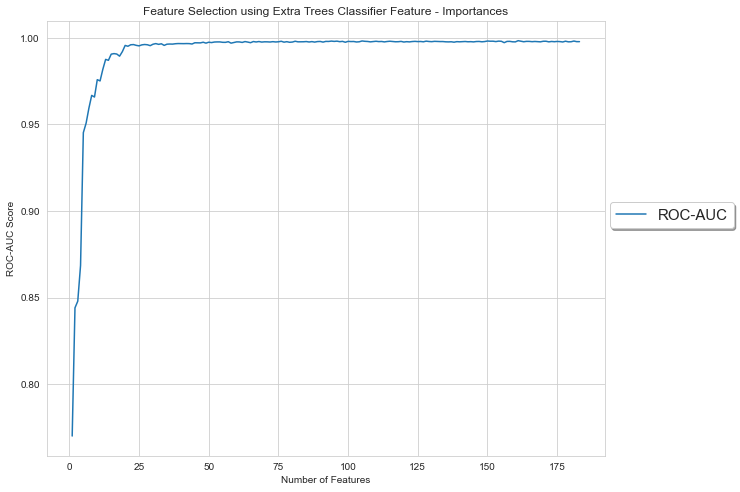

In [69]:
incremental_plot_auc(1,184, title)

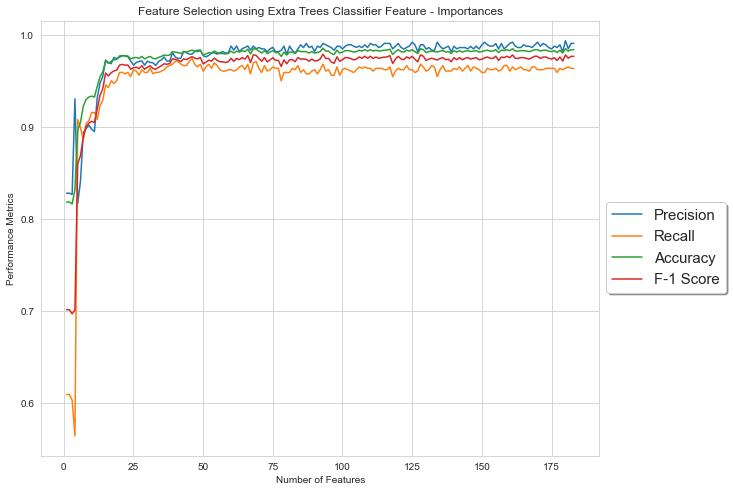

In [70]:
incremental_plot(1,184, title)


## Feature Selection Based on Mutual Information (Entropy) Gain

In [71]:
from sklearn.feature_selection import mutual_info_classif

In [72]:
mi = mutual_info_classif(X_train, y_train)

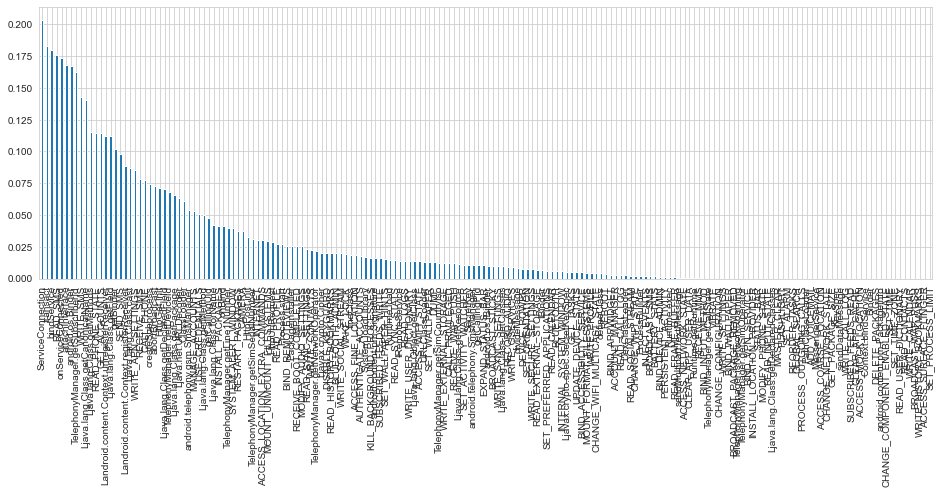

In [73]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)
mi.plot.bar(figsize = (16,5))

In [74]:
clear_metrics()
for index in range(1, 184,1):
    top_permissions_indexes = []
    top_permissions_indexes = mi.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7584   (+/- 0.0453)
Precision: 0.6003   (+/- 0.0453)
Recall: 0.9338   (+/- 0.0453)
F-1 Score: 0.7305   (+/- 0.0453)
ROC-AUC: 0.7989   (+/- 0.0453)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7853   (+/- 0.0431)
Precision: 0.6344   (+/- 0.0431)
Recall: 0.9142   (+/- 0.0431)
F-1 Score: 0.7488   (+/- 0.0431)
ROC-AUC: 0.8289   (+/- 0.0431)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.7842   (+/- 0.0424)
Precision: 0.6330   (+/- 0.0424)
Recall: 0.9142   (+/- 0.0424)
F-1 Score: 0.7479   (+/- 0.0424)
ROC-AUC: 0.8264   (+/- 0.0424)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.8421   (+/- 0.0249)
Precision: 0.9417   (+/- 0.0249)
Recall: 0.5864   (+/- 0.0249)
F-1 Score: 0.7218   (+/- 0.0249)
ROC-AUC: 0.9134   (+/- 0.0249)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.8426   (+/- 0.0247)
Precision: 0.9436   (+/- 0.0247)
Recall: 0.5864   (+

Classification Report for Random Forest:    39
Accuracy: 0.9716   (+/- 0.0246)
Precision: 0.9640   (+/- 0.0246)
Recall: 0.9548   (+/- 0.0246)
F-1 Score: 0.9591   (+/- 0.0246)
ROC-AUC: 0.9941   (+/- 0.0246)
(1900, 40)
Classification Report for Random Forest:    40
Accuracy: 0.9711   (+/- 0.0276)
Precision: 0.9653   (+/- 0.0276)
Recall: 0.9519   (+/- 0.0276)
F-1 Score: 0.9582   (+/- 0.0276)
ROC-AUC: 0.9944   (+/- 0.0276)
(1900, 41)
Classification Report for Random Forest:    41
Accuracy: 0.9732   (+/- 0.0208)
Precision: 0.9656   (+/- 0.0208)
Recall: 0.9579   (+/- 0.0208)
F-1 Score: 0.9614   (+/- 0.0208)
ROC-AUC: 0.9944   (+/- 0.0208)
(1900, 42)
Classification Report for Random Forest:    42
Accuracy: 0.9705   (+/- 0.0287)
Precision: 0.9638   (+/- 0.0287)
Recall: 0.9518   (+/- 0.0287)
F-1 Score: 0.9575   (+/- 0.0287)
ROC-AUC: 0.9942   (+/- 0.0287)
(1900, 43)
Classification Report for Random Forest:    43
Accuracy: 0.9747   (+/- 0.0187)
Precision: 0.9714   (+/- 0.0187)
Recall: 0.9564   (+/

Classification Report for Random Forest:    77
Accuracy: 0.9805   (+/- 0.0189)
Precision: 0.9819   (+/- 0.0189)
Recall: 0.9624   (+/- 0.0189)
F-1 Score: 0.9717   (+/- 0.0189)
ROC-AUC: 0.9952   (+/- 0.0189)
(1900, 78)
Classification Report for Random Forest:    78
Accuracy: 0.9811   (+/- 0.0217)
Precision: 0.9818   (+/- 0.0217)
Recall: 0.9639   (+/- 0.0217)
F-1 Score: 0.9726   (+/- 0.0217)
ROC-AUC: 0.9950   (+/- 0.0217)
(1900, 79)
Classification Report for Random Forest:    79
Accuracy: 0.9805   (+/- 0.0163)
Precision: 0.9805   (+/- 0.0163)
Recall: 0.9639   (+/- 0.0163)
F-1 Score: 0.9718   (+/- 0.0163)
ROC-AUC: 0.9942   (+/- 0.0163)
(1900, 80)
Classification Report for Random Forest:    80
Accuracy: 0.9811   (+/- 0.0143)
Precision: 0.9806   (+/- 0.0143)
Recall: 0.9654   (+/- 0.0143)
F-1 Score: 0.9727   (+/- 0.0143)
ROC-AUC: 0.9951   (+/- 0.0143)
(1900, 81)
Classification Report for Random Forest:    81
Accuracy: 0.9800   (+/- 0.0168)
Precision: 0.9789   (+/- 0.0168)
Recall: 0.9639   (+/

Classification Report for Random Forest:    115
Accuracy: 0.9821   (+/- 0.0212)
Precision: 0.9850   (+/- 0.0212)
Recall: 0.9639   (+/- 0.0212)
F-1 Score: 0.9740   (+/- 0.0212)
ROC-AUC: 0.9950   (+/- 0.0212)
(1900, 116)
Classification Report for Random Forest:    116
Accuracy: 0.9816   (+/- 0.0217)
Precision: 0.9862   (+/- 0.0217)
Recall: 0.9609   (+/- 0.0217)
F-1 Score: 0.9732   (+/- 0.0217)
ROC-AUC: 0.9952   (+/- 0.0217)
(1900, 117)
Classification Report for Random Forest:    117
Accuracy: 0.9837   (+/- 0.0213)
Precision: 0.9880   (+/- 0.0213)
Recall: 0.9654   (+/- 0.0213)
F-1 Score: 0.9763   (+/- 0.0213)
ROC-AUC: 0.9961   (+/- 0.0213)
(1900, 118)
Classification Report for Random Forest:    118
Accuracy: 0.9821   (+/- 0.0206)
Precision: 0.9833   (+/- 0.0206)
Recall: 0.9654   (+/- 0.0206)
F-1 Score: 0.9741   (+/- 0.0206)
ROC-AUC: 0.9964   (+/- 0.0206)
(1900, 119)
Classification Report for Random Forest:    119
Accuracy: 0.9811   (+/- 0.0164)
Precision: 0.9850   (+/- 0.0164)
Recall: 0.9

Classification Report for Random Forest:    153
Accuracy: 0.9837   (+/- 0.0191)
Precision: 0.9880   (+/- 0.0191)
Recall: 0.9654   (+/- 0.0191)
F-1 Score: 0.9763   (+/- 0.0191)
ROC-AUC: 0.9982   (+/- 0.0191)
(1900, 154)
Classification Report for Random Forest:    154
Accuracy: 0.9816   (+/- 0.0184)
Precision: 0.9865   (+/- 0.0184)
Recall: 0.9609   (+/- 0.0184)
F-1 Score: 0.9732   (+/- 0.0184)
ROC-AUC: 0.9976   (+/- 0.0184)
(1900, 155)
Classification Report for Random Forest:    155
Accuracy: 0.9832   (+/- 0.0193)
Precision: 0.9909   (+/- 0.0193)
Recall: 0.9609   (+/- 0.0193)
F-1 Score: 0.9754   (+/- 0.0193)
ROC-AUC: 0.9977   (+/- 0.0193)
(1900, 156)
Classification Report for Random Forest:    156
Accuracy: 0.9821   (+/- 0.0232)
Precision: 0.9865   (+/- 0.0232)
Recall: 0.9624   (+/- 0.0232)
F-1 Score: 0.9740   (+/- 0.0232)
ROC-AUC: 0.9976   (+/- 0.0232)
(1900, 157)
Classification Report for Random Forest:    157
Accuracy: 0.9821   (+/- 0.0184)
Precision: 0.9864   (+/- 0.0184)
Recall: 0.9

In [75]:
title = "Feature Selection using Mutual Information Gain (Entropy)"
results_to_csv(title)

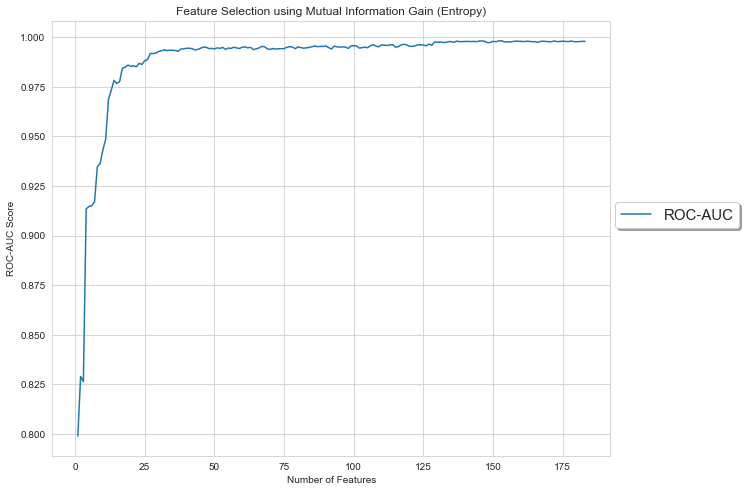

In [76]:
incremental_plot_auc(1,184, title)

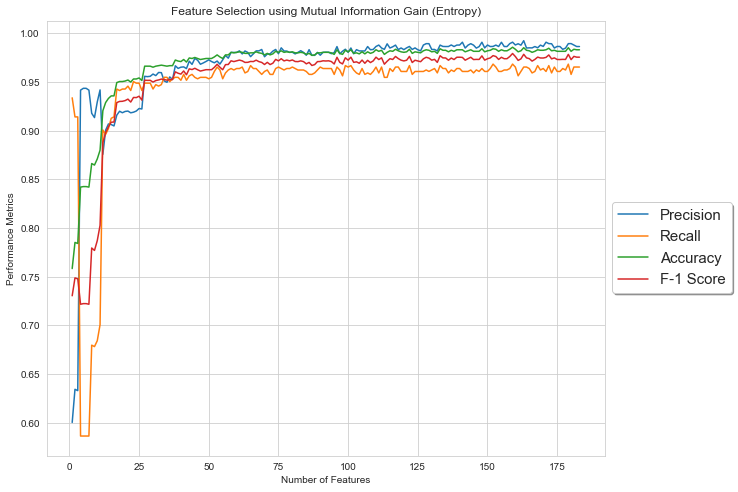

In [77]:
incremental_plot(1,184, title)


In [78]:
top_permissions_indexes = mi.nlargest(30).index
X_top_feat_imps = X.loc[:,top_permissions_indexes ]
print(X_top_feat_imps.shape)
run_randomForest(X_top_feat_imps,y_all, index)

NameError: name 'X' is not defined

## Feature Selection Based on Univariate ROC_AUC for Classification

In [79]:
from sklearn.metrics import roc_auc_score

roc_auc = []
for feature in X_train.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = clf.predict(X_validate[feature].to_frame())
    roc_auc.append(roc_auc_score(y_validate, y_pred))

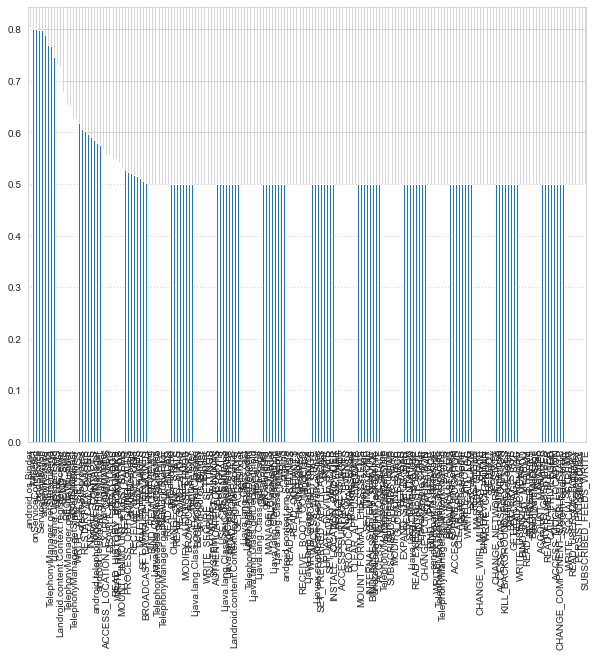

In [80]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train.columns
roc_values.sort_values(ascending =False, inplace = True)
roc_values.plot.bar()

In [81]:
sel = roc_values[roc_values>0.5]
X_roc_auc = X_train[sel.index]
X_roc_auc.shape

(1899, 39)

In [82]:
clear_metrics()
for index in range(1, len(sel)):
    top_permissions_indexes = []
    top_permissions_indexes = sel.nlargest(index).index
    X_top_feat_imps = X_validate.loc[:,top_permissions_indexes ]
    print(X_top_feat_imps.shape)
    run_randomForest(X_top_feat_imps,y_validate, index)

(1900, 1)
Classification Report for Random Forest:    1
Accuracy: 0.7737   (+/- 0.0578)
Precision: 0.6223   (+/- 0.0578)
Recall: 0.9052   (+/- 0.0578)
F-1 Score: 0.7372   (+/- 0.0578)
ROC-AUC: 0.8040   (+/- 0.0578)
(1900, 2)
Classification Report for Random Forest:    2
Accuracy: 0.7742   (+/- 0.0574)
Precision: 0.6229   (+/- 0.0574)
Recall: 0.9052   (+/- 0.0574)
F-1 Score: 0.7377   (+/- 0.0574)
ROC-AUC: 0.8166   (+/- 0.0574)
(1900, 3)
Classification Report for Random Forest:    3
Accuracy: 0.7926   (+/- 0.0520)
Precision: 0.6467   (+/- 0.0520)
Recall: 0.9007   (+/- 0.0520)
F-1 Score: 0.7526   (+/- 0.0520)
ROC-AUC: 0.8360   (+/- 0.0520)
(1900, 4)
Classification Report for Random Forest:    4
Accuracy: 0.7937   (+/- 0.0522)
Precision: 0.6481   (+/- 0.0522)
Recall: 0.9007   (+/- 0.0522)
F-1 Score: 0.7536   (+/- 0.0522)
ROC-AUC: 0.8372   (+/- 0.0522)
(1900, 5)
Classification Report for Random Forest:    5
Accuracy: 0.7926   (+/- 0.0516)
Precision: 0.6473   (+/- 0.0516)
Recall: 0.8977   (+

In [91]:
top_permissions_indexes = []
top_permissions_indexes = sel.nlargest(30).index
X_top_feat_imps = X.loc[:,top_permissions_indexes ]
print(X_top_feat_imps.shape)


NameError: name 'X' is not defined

In [ ]:
%%time 
run_randomForest(X_top_feat_imps,y_all, index)

In [83]:
title = "Feature Selection Based on Univariate ROC_AUC Score"
results_to_csv(title)

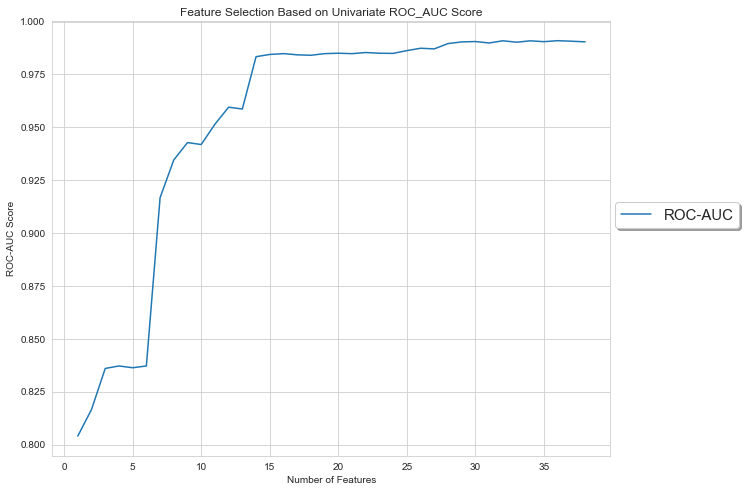

In [84]:
incremental_plot_auc(1,len(sel), title)

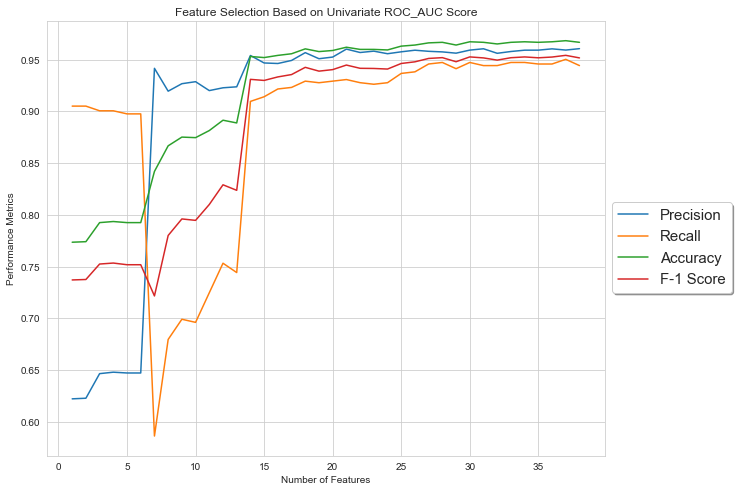

In [85]:
incremental_plot(1,len(sel), title)


## Feature Selection using Principal Component Analysis

In [87]:
clear_metrics()
for component in range(1,184):
    pca = PCA(n_components=component, random_state=0)
    pca.fit(X_train)
    X_pca_optimal = pca.transform(X_validate)
    print('Selected Components: ', component)
    run_randomForest(X_pca_optimal,y_validate,component)
    print()

Selected Components:  1
Classification Report for Random Forest:    1
Accuracy: 0.8442   (+/- 0.0492)
Precision: 0.7683   (+/- 0.0492)
Recall: 0.7968   (+/- 0.0492)
F-1 Score: 0.7805   (+/- 0.0492)
ROC-AUC: 0.9054   (+/- 0.0492)

Selected Components:  2
Classification Report for Random Forest:    2
Accuracy: 0.9437   (+/- 0.0216)
Precision: 0.9223   (+/- 0.0216)
Recall: 0.9172   (+/- 0.0216)
F-1 Score: 0.9194   (+/- 0.0216)
ROC-AUC: 0.9781   (+/- 0.0216)

Selected Components:  3
Classification Report for Random Forest:    3
Accuracy: 0.9526   (+/- 0.0282)
Precision: 0.9429   (+/- 0.0282)
Recall: 0.9218   (+/- 0.0282)
F-1 Score: 0.9314   (+/- 0.0282)
ROC-AUC: 0.9836   (+/- 0.0282)

Selected Components:  4
Classification Report for Random Forest:    4
Accuracy: 0.9637   (+/- 0.0276)
Precision: 0.9597   (+/- 0.0276)
Recall: 0.9368   (+/- 0.0276)
F-1 Score: 0.9472   (+/- 0.0276)
ROC-AUC: 0.9876   (+/- 0.0276)

Selected Components:  5
Classification Report for Random Forest:    5
Accuracy: 

Classification Report for Random Forest:    37
Accuracy: 0.9700   (+/- 0.0294)
Precision: 0.9831   (+/- 0.0294)
Recall: 0.9308   (+/- 0.0294)
F-1 Score: 0.9558   (+/- 0.0294)
ROC-AUC: 0.9947   (+/- 0.0294)

Selected Components:  38
Classification Report for Random Forest:    38
Accuracy: 0.9689   (+/- 0.0288)
Precision: 0.9860   (+/- 0.0288)
Recall: 0.9247   (+/- 0.0288)
F-1 Score: 0.9538   (+/- 0.0288)
ROC-AUC: 0.9944   (+/- 0.0288)

Selected Components:  39
Classification Report for Random Forest:    39
Accuracy: 0.9684   (+/- 0.0279)
Precision: 0.9862   (+/- 0.0279)
Recall: 0.9232   (+/- 0.0279)
F-1 Score: 0.9531   (+/- 0.0279)
ROC-AUC: 0.9939   (+/- 0.0279)

Selected Components:  40
Classification Report for Random Forest:    40
Accuracy: 0.9700   (+/- 0.0262)
Precision: 0.9862   (+/- 0.0262)
Recall: 0.9277   (+/- 0.0262)
F-1 Score: 0.9556   (+/- 0.0262)
ROC-AUC: 0.9947   (+/- 0.0262)

Selected Components:  41
Classification Report for Random Forest:    41
Accuracy: 0.9689   (+/- 0

Classification Report for Random Forest:    73
Accuracy: 0.9642   (+/- 0.0239)
Precision: 0.9921   (+/- 0.0239)
Recall: 0.9052   (+/- 0.0239)
F-1 Score: 0.9462   (+/- 0.0239)
ROC-AUC: 0.9939   (+/- 0.0239)

Selected Components:  74
Classification Report for Random Forest:    74
Accuracy: 0.9695   (+/- 0.0274)
Precision: 0.9937   (+/- 0.0274)
Recall: 0.9188   (+/- 0.0274)
F-1 Score: 0.9543   (+/- 0.0274)
ROC-AUC: 0.9938   (+/- 0.0274)

Selected Components:  75
Classification Report for Random Forest:    75
Accuracy: 0.9668   (+/- 0.0267)
Precision: 0.9937   (+/- 0.0267)
Recall: 0.9113   (+/- 0.0267)
F-1 Score: 0.9501   (+/- 0.0267)
ROC-AUC: 0.9934   (+/- 0.0267)

Selected Components:  76
Classification Report for Random Forest:    76
Accuracy: 0.9674   (+/- 0.0278)
Precision: 0.9908   (+/- 0.0278)
Recall: 0.9157   (+/- 0.0278)
F-1 Score: 0.9512   (+/- 0.0278)
ROC-AUC: 0.9938   (+/- 0.0278)

Selected Components:  77
Classification Report for Random Forest:    77
Accuracy: 0.9637   (+/- 0

Classification Report for Random Forest:    109
Accuracy: 0.9674   (+/- 0.0234)
Precision: 0.9952   (+/- 0.0234)
Recall: 0.9112   (+/- 0.0234)
F-1 Score: 0.9510   (+/- 0.0234)
ROC-AUC: 0.9936   (+/- 0.0234)

Selected Components:  110
Classification Report for Random Forest:    110
Accuracy: 0.9679   (+/- 0.0228)
Precision: 0.9983   (+/- 0.0228)
Recall: 0.9097   (+/- 0.0228)
F-1 Score: 0.9517   (+/- 0.0228)
ROC-AUC: 0.9931   (+/- 0.0228)

Selected Components:  111
Classification Report for Random Forest:    111
Accuracy: 0.9632   (+/- 0.0231)
Precision: 0.9984   (+/- 0.0231)
Recall: 0.8961   (+/- 0.0231)
F-1 Score: 0.9441   (+/- 0.0231)
ROC-AUC: 0.9932   (+/- 0.0231)

Selected Components:  112
Classification Report for Random Forest:    112
Accuracy: 0.9632   (+/- 0.0211)
Precision: 0.9984   (+/- 0.0211)
Recall: 0.8961   (+/- 0.0211)
F-1 Score: 0.9442   (+/- 0.0211)
ROC-AUC: 0.9937   (+/- 0.0211)

Selected Components:  113
Classification Report for Random Forest:    113
Accuracy: 0.9637

Classification Report for Random Forest:    145
Accuracy: 0.9647   (+/- 0.0231)
Precision: 0.9951   (+/- 0.0231)
Recall: 0.9037   (+/- 0.0231)
F-1 Score: 0.9469   (+/- 0.0231)
ROC-AUC: 0.9939   (+/- 0.0231)

Selected Components:  146
Classification Report for Random Forest:    146
Accuracy: 0.9642   (+/- 0.0308)
Precision: 0.9983   (+/- 0.0308)
Recall: 0.8991   (+/- 0.0308)
F-1 Score: 0.9456   (+/- 0.0308)
ROC-AUC: 0.9933   (+/- 0.0308)

Selected Components:  147
Classification Report for Random Forest:    147
Accuracy: 0.9637   (+/- 0.0272)
Precision: 1.0000   (+/- 0.0272)
Recall: 0.8961   (+/- 0.0272)
F-1 Score: 0.9447   (+/- 0.0272)
ROC-AUC: 0.9933   (+/- 0.0272)

Selected Components:  148
Classification Report for Random Forest:    148
Accuracy: 0.9637   (+/- 0.0251)
Precision: 0.9968   (+/- 0.0251)
Recall: 0.8991   (+/- 0.0251)
F-1 Score: 0.9450   (+/- 0.0251)
ROC-AUC: 0.9938   (+/- 0.0251)

Selected Components:  149
Classification Report for Random Forest:    149
Accuracy: 0.9637

Classification Report for Random Forest:    181
Accuracy: 0.9574   (+/- 0.0268)
Precision: 0.9983   (+/- 0.0268)
Recall: 0.8796   (+/- 0.0268)
F-1 Score: 0.9347   (+/- 0.0268)
ROC-AUC: 0.9941   (+/- 0.0268)

Selected Components:  182
Classification Report for Random Forest:    182
Accuracy: 0.9547   (+/- 0.0302)
Precision: 0.9983   (+/- 0.0302)
Recall: 0.8721   (+/- 0.0302)
F-1 Score: 0.9304   (+/- 0.0302)
ROC-AUC: 0.9945   (+/- 0.0302)



In [88]:
title = "Feature Selection using Principal Component Analysis"
results_to_csv(title)

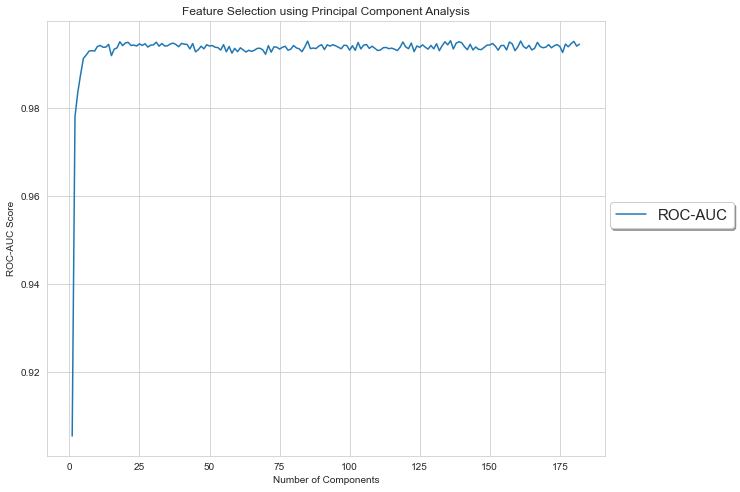

In [90]:
incremental_plot_auc(1,183, title, "Number of Components")

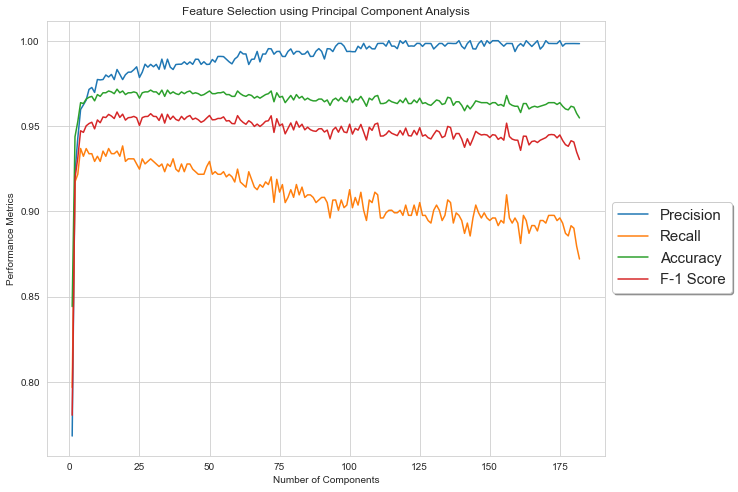

In [91]:
incremental_plot(1,183, title, "Number of Components")


## Feature Selection using RFE (RandomForestClassifier)

In [92]:
#best RFE(RandomForestClassifier) features
clear_metrics()
for index in range(1, 184, 1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    run_randomForest(X_transform, y_validate, index)

(1900, 1)
Selected Feature:  1
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Selected Feature:  2
Classification Report for Random Forest:    2
Accuracy: 0.8405   (+/- 0.0240)
Precision: 0.9455   (+/- 0.0240)
Recall: 0.5789   (+/- 0.0240)
F-1 Score: 0.7170   (+/- 0.0240)
ROC-AUC: 0.8973   (+/- 0.0240)
(1900, 3)
Selected Feature:  3
Classification Report for Random Forest:    3
Accuracy: 0.8647   (+/- 0.0408)
Precision: 0.8843   (+/- 0.0408)
Recall: 0.7068   (+/- 0.0408)
F-1 Score: 0.7848   (+/- 0.0408)
ROC-AUC: 0.9237   (+/- 0.0408)
(1900, 4)
Selected Feature:  4
Classification Report for Random Forest:    4
Accuracy: 0.9216   (+/- 0.0525)
Precision: 0.9159   (+/- 0.0525)
Recall: 0.8541   (+/- 0.0525)
F-1 Score: 0.8834   (+/- 0.0525)
ROC-AUC: 0.9548   (+/- 0.0525)
(1900, 5)
Selected Feature:  5
Classification Report for

(1900, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9805   (+/- 0.0240)
Precision: 0.9809   (+/- 0.0240)
Recall: 0.9639   (+/- 0.0240)
F-1 Score: 0.9718   (+/- 0.0240)
ROC-AUC: 0.9967   (+/- 0.0240)
(1900, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9811   (+/- 0.0241)
Precision: 0.9781   (+/- 0.0241)
Recall: 0.9684   (+/- 0.0241)
F-1 Score: 0.9728   (+/- 0.0241)
ROC-AUC: 0.9968   (+/- 0.0241)
(1900, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9816   (+/- 0.0246)
Precision: 0.9781   (+/- 0.0246)
Recall: 0.9699   (+/- 0.0246)
F-1 Score: 0.9735   (+/- 0.0246)
ROC-AUC: 0.9964   (+/- 0.0246)
(1900, 39)
Selected Feature:  39
Classification Report for Random Forest:    39
Accuracy: 0.9811   (+/- 0.0217)
Precision: 0.9809   (+/- 0.0217)
Recall: 0.9654   (+/- 0.0217)
F-1 Score: 0.9727   (+/- 0.0217)
ROC-AUC: 0.9965   (+/- 0.0217)
(1900, 40)
Selected Feature:  40
Classificat

(1900, 71)
Selected Feature:  71
Classification Report for Random Forest:    71
Accuracy: 0.9805   (+/- 0.0194)
Precision: 0.9821   (+/- 0.0194)
Recall: 0.9624   (+/- 0.0194)
F-1 Score: 0.9718   (+/- 0.0194)
ROC-AUC: 0.9977   (+/- 0.0194)
(1900, 72)
Selected Feature:  72
Classification Report for Random Forest:    72
Accuracy: 0.9826   (+/- 0.0200)
Precision: 0.9836   (+/- 0.0200)
Recall: 0.9669   (+/- 0.0200)
F-1 Score: 0.9748   (+/- 0.0200)
ROC-AUC: 0.9976   (+/- 0.0200)
(1900, 73)
Selected Feature:  73
Classification Report for Random Forest:    73
Accuracy: 0.9826   (+/- 0.0189)
Precision: 0.9851   (+/- 0.0189)
Recall: 0.9654   (+/- 0.0189)
F-1 Score: 0.9748   (+/- 0.0189)
ROC-AUC: 0.9974   (+/- 0.0189)
(1900, 74)
Selected Feature:  74
Classification Report for Random Forest:    74
Accuracy: 0.9842   (+/- 0.0141)
Precision: 0.9882   (+/- 0.0141)
Recall: 0.9669   (+/- 0.0141)
F-1 Score: 0.9771   (+/- 0.0141)
ROC-AUC: 0.9977   (+/- 0.0141)
(1900, 75)
Selected Feature:  75
Classificat

D:\Galib\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Classification Report for Random Forest:    84
Accuracy: 0.9795   (+/- 0.0179)
Precision: 0.9818   (+/- 0.0179)
Recall: 0.9594   (+/- 0.0179)
F-1 Score: 0.9702   (+/- 0.0179)
ROC-AUC: 0.9974   (+/- 0.0179)
(1900, 85)
Selected Feature:  85
Classification Report for Random Forest:    85
Accuracy: 0.9805   (+/- 0.0211)
Precision: 0.9880   (+/- 0.0211)
Recall: 0.9564   (+/- 0.0211)
F-1 Score: 0.9715   (+/- 0.0211)
ROC-AUC: 0.9976   (+/- 0.0211)
(1900, 86)
Selected Feature:  86
Classification Report for Random Forest:    86
Accuracy: 0.9826   (+/- 0.0170)
Precision: 0.9881   (+/- 0.0170)
Recall: 0.9624   (+/- 0.0170)
F-1 Score: 0.9748   (+/- 0.0170)
ROC-AUC: 0.9977   (+/- 0.0170)
(1900, 87)
Selected Feature:  87
Classification Report for Random Forest:    87
Accuracy: 0.9821   (+/- 0.0171)
Precision: 0.9880   (+/- 0.0171)
Recall: 0.9609   (+/- 0.0171)
F-1 Score: 0.9739   (+/- 0.0171)
ROC-AUC: 0.9975   (+/- 0.0171)
(1900, 88)
Selected Feature:  88
Classification Report for Random Forest:    

(1900, 119)
Selected Feature:  119
Classification Report for Random Forest:    119
Accuracy: 0.9805   (+/- 0.0170)
Precision: 0.9851   (+/- 0.0170)
Recall: 0.9594   (+/- 0.0170)
F-1 Score: 0.9716   (+/- 0.0170)
ROC-AUC: 0.9981   (+/- 0.0170)
(1900, 120)
Selected Feature:  120
Classification Report for Random Forest:    120
Accuracy: 0.9826   (+/- 0.0200)
Precision: 0.9848   (+/- 0.0200)
Recall: 0.9655   (+/- 0.0200)
F-1 Score: 0.9749   (+/- 0.0200)
ROC-AUC: 0.9980   (+/- 0.0200)
(1900, 121)
Selected Feature:  121
Classification Report for Random Forest:    121
Accuracy: 0.9805   (+/- 0.0211)
Precision: 0.9864   (+/- 0.0211)
Recall: 0.9579   (+/- 0.0211)
F-1 Score: 0.9716   (+/- 0.0211)
ROC-AUC: 0.9978   (+/- 0.0211)
(1900, 122)
Selected Feature:  122
Classification Report for Random Forest:    122
Accuracy: 0.9821   (+/- 0.0217)
Precision: 0.9865   (+/- 0.0217)
Recall: 0.9624   (+/- 0.0217)
F-1 Score: 0.9740   (+/- 0.0217)
ROC-AUC: 0.9977   (+/- 0.0217)
(1900, 123)
Selected Feature:  1

(1900, 153)
Selected Feature:  153
Classification Report for Random Forest:    153
Accuracy: 0.9811   (+/- 0.0222)
Precision: 0.9879   (+/- 0.0222)
Recall: 0.9579   (+/- 0.0222)
F-1 Score: 0.9723   (+/- 0.0222)
ROC-AUC: 0.9979   (+/- 0.0222)
(1900, 154)
Selected Feature:  154
Classification Report for Random Forest:    154
Accuracy: 0.9826   (+/- 0.0205)
Precision: 0.9879   (+/- 0.0205)
Recall: 0.9624   (+/- 0.0205)
F-1 Score: 0.9747   (+/- 0.0205)
ROC-AUC: 0.9977   (+/- 0.0205)
(1900, 155)
Selected Feature:  155
Classification Report for Random Forest:    155
Accuracy: 0.9821   (+/- 0.0184)
Precision: 0.9864   (+/- 0.0184)
Recall: 0.9624   (+/- 0.0184)
F-1 Score: 0.9740   (+/- 0.0184)
ROC-AUC: 0.9977   (+/- 0.0184)
(1900, 156)
Selected Feature:  156
Classification Report for Random Forest:    156
Accuracy: 0.9832   (+/- 0.0239)
Precision: 0.9850   (+/- 0.0239)
Recall: 0.9669   (+/- 0.0239)
F-1 Score: 0.9757   (+/- 0.0239)
ROC-AUC: 0.9976   (+/- 0.0239)
(1900, 157)
Selected Feature:  1

In [93]:
title = "Recursive Feature Elimination (RFE) using Random Forest Classifier"
results_to_csv(title)

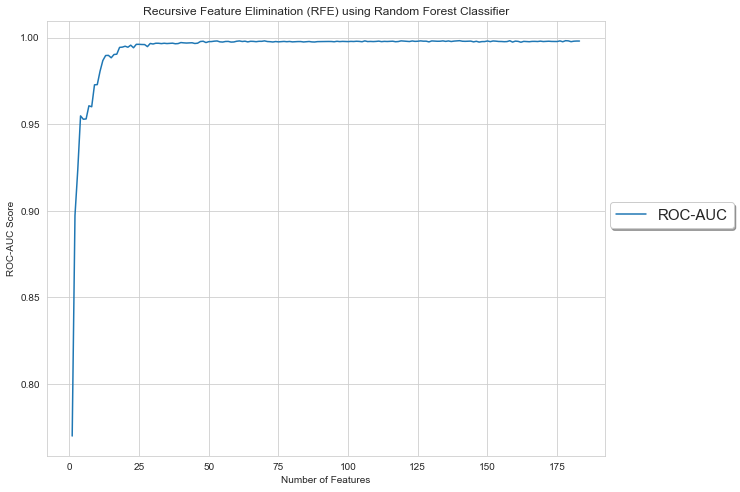

In [94]:
incremental_plot_auc(1,184, title)

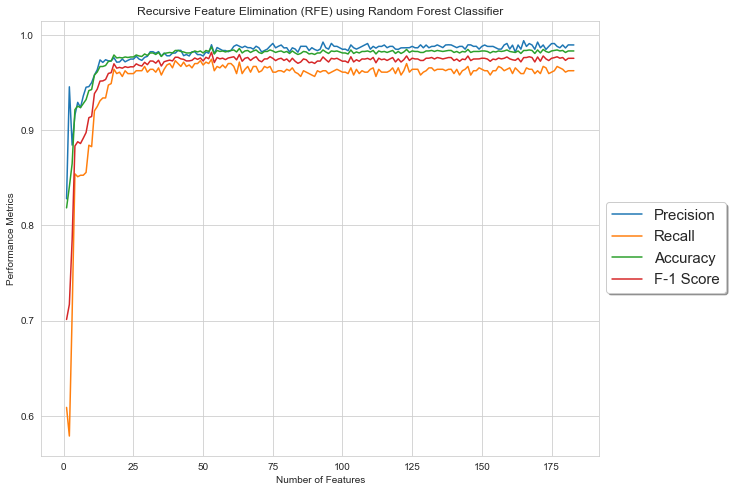

In [95]:
incremental_plot(1,184, title)


In [ ]:
#best RFE(Gradient BoostingClassifier) features
clear_metrics()
for index in range(1, 184, 1):
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = index)
    sel.fit(X_train,y_train)
    X_optimal_gradient = sel.transform(X_validate)
    print(X_optimal_gradient.shape)
    print('Selected Feature: ', index)
    run_randomForest(X_optimal_gradient,y_validate, index)

(1900, 1)
Selected Feature:  1
Classification Report for Random Forest:    1
Accuracy: 0.8184   (+/- 0.0397)
Precision: 0.8280   (+/- 0.0397)
Recall: 0.6089   (+/- 0.0397)
F-1 Score: 0.7012   (+/- 0.0397)
ROC-AUC: 0.7701   (+/- 0.0397)
(1900, 2)
Selected Feature:  2
Classification Report for Random Forest:    2
Accuracy: 0.8405   (+/- 0.0240)
Precision: 0.9455   (+/- 0.0240)
Recall: 0.5789   (+/- 0.0240)
F-1 Score: 0.7170   (+/- 0.0240)
ROC-AUC: 0.8973   (+/- 0.0240)
(1900, 3)
Selected Feature:  3
Classification Report for Random Forest:    3
Accuracy: 0.9058   (+/- 0.0307)
Precision: 0.9097   (+/- 0.0307)
Recall: 0.8119   (+/- 0.0307)
F-1 Score: 0.8575   (+/- 0.0307)
ROC-AUC: 0.9328   (+/- 0.0307)
(1900, 4)
Selected Feature:  4
Classification Report for Random Forest:    4
Accuracy: 0.9042   (+/- 0.0355)
Precision: 0.9079   (+/- 0.0355)
Recall: 0.8104   (+/- 0.0355)
F-1 Score: 0.8554   (+/- 0.0355)
ROC-AUC: 0.9482   (+/- 0.0355)
(1900, 5)
Selected Feature:  5
Classification Report for

(1900, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9800   (+/- 0.0199)
Precision: 0.9790   (+/- 0.0199)
Recall: 0.9639   (+/- 0.0199)
F-1 Score: 0.9711   (+/- 0.0199)
ROC-AUC: 0.9981   (+/- 0.0199)
(1900, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9805   (+/- 0.0205)
Precision: 0.9778   (+/- 0.0205)
Recall: 0.9669   (+/- 0.0205)
F-1 Score: 0.9719   (+/- 0.0205)
ROC-AUC: 0.9975   (+/- 0.0205)
(1900, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9805   (+/- 0.0200)
Precision: 0.9849   (+/- 0.0200)
Recall: 0.9594   (+/- 0.0200)
F-1 Score: 0.9717   (+/- 0.0200)
ROC-AUC: 0.9980   (+/- 0.0200)
(1900, 39)
Selected Feature:  39
Classification Report for Random Forest:    39
Accuracy: 0.9768   (+/- 0.0250)
Precision: 0.9731   (+/- 0.0250)
Recall: 0.9608   (+/- 0.0250)
F-1 Score: 0.9666   (+/- 0.0250)
ROC-AUC: 0.9971   (+/- 0.0250)
(1900, 40)
Selected Feature:  40
Classificat

(1900, 71)
Selected Feature:  71
Classification Report for Random Forest:    71
Accuracy: 0.9821   (+/- 0.0195)
Precision: 0.9863   (+/- 0.0195)
Recall: 0.9624   (+/- 0.0195)
F-1 Score: 0.9739   (+/- 0.0195)
ROC-AUC: 0.9982   (+/- 0.0195)
(1900, 72)
Selected Feature:  72
Classification Report for Random Forest:    72
Accuracy: 0.9832   (+/- 0.0168)
Precision: 0.9881   (+/- 0.0168)
Recall: 0.9639   (+/- 0.0168)
F-1 Score: 0.9755   (+/- 0.0168)
ROC-AUC: 0.9984   (+/- 0.0168)
(1900, 73)
Selected Feature:  73
Classification Report for Random Forest:    73
Accuracy: 0.9832   (+/- 0.0193)
Precision: 0.9881   (+/- 0.0193)
Recall: 0.9639   (+/- 0.0193)
F-1 Score: 0.9756   (+/- 0.0193)
ROC-AUC: 0.9979   (+/- 0.0193)
(1900, 74)
Selected Feature:  74
Classification Report for Random Forest:    74
Accuracy: 0.9805   (+/- 0.0205)
Precision: 0.9821   (+/- 0.0205)
Recall: 0.9623   (+/- 0.0205)
F-1 Score: 0.9716   (+/- 0.0205)
ROC-AUC: 0.9984   (+/- 0.0205)
(1900, 75)
Selected Feature:  75
Classificat

(1900, 106)
Selected Feature:  106
Classification Report for Random Forest:    106
Accuracy: 0.9837   (+/- 0.0185)
Precision: 0.9911   (+/- 0.0185)
Recall: 0.9624   (+/- 0.0185)
F-1 Score: 0.9762   (+/- 0.0185)
ROC-AUC: 0.9980   (+/- 0.0185)
(1900, 107)
Selected Feature:  107
Classification Report for Random Forest:    107
Accuracy: 0.9811   (+/- 0.0206)
Precision: 0.9821   (+/- 0.0206)
Recall: 0.9639   (+/- 0.0206)
F-1 Score: 0.9725   (+/- 0.0206)
ROC-AUC: 0.9979   (+/- 0.0206)
(1900, 108)
Selected Feature:  108
Classification Report for Random Forest:    108
Accuracy: 0.9784   (+/- 0.0213)
Precision: 0.9833   (+/- 0.0213)
Recall: 0.9548   (+/- 0.0213)
F-1 Score: 0.9685   (+/- 0.0213)
ROC-AUC: 0.9977   (+/- 0.0213)
(1900, 109)
Selected Feature:  109
Classification Report for Random Forest:    109
Accuracy: 0.9826   (+/- 0.0258)
Precision: 0.9863   (+/- 0.0258)
Recall: 0.9639   (+/- 0.0258)
F-1 Score: 0.9746   (+/- 0.0258)
ROC-AUC: 0.9979   (+/- 0.0258)
(1900, 110)
Selected Feature:  1

(1900, 140)
Selected Feature:  140
Classification Report for Random Forest:    140
Accuracy: 0.9826   (+/- 0.0231)
Precision: 0.9864   (+/- 0.0231)
Recall: 0.9639   (+/- 0.0231)
F-1 Score: 0.9748   (+/- 0.0231)
ROC-AUC: 0.9981   (+/- 0.0231)
(1900, 141)
Selected Feature:  141
Classification Report for Random Forest:    141
Accuracy: 0.9805   (+/- 0.0249)
Precision: 0.9821   (+/- 0.0249)
Recall: 0.9624   (+/- 0.0249)
F-1 Score: 0.9717   (+/- 0.0249)
ROC-AUC: 0.9977   (+/- 0.0249)
(1900, 142)
Selected Feature:  142
Classification Report for Random Forest:    142
Accuracy: 0.9832   (+/- 0.0193)
Precision: 0.9865   (+/- 0.0193)
Recall: 0.9654   (+/- 0.0193)
F-1 Score: 0.9756   (+/- 0.0193)
ROC-AUC: 0.9974   (+/- 0.0193)
(1900, 143)
Selected Feature:  143
Classification Report for Random Forest:    143
Accuracy: 0.9826   (+/- 0.0205)
Precision: 0.9850   (+/- 0.0205)
Recall: 0.9654   (+/- 0.0205)
F-1 Score: 0.9748   (+/- 0.0205)
ROC-AUC: 0.9979   (+/- 0.0205)
(1900, 144)
Selected Feature:  1

In [ ]:
title = "Recursive Feature Elimination (RFE) using Gradient Boosting Classifier"
results_to_csv(title)

In [ ]:
incremental_plot_auc(1,184, title)

In [ ]:
incremental_plot(1,184, title)


# Classifiers Evaluation

## For All Features

In [83]:
start = time.time()
run_svm(X_all, y_all)
end = time.time()
print(end - start)

ValueError: X.shape[0] should be equal to X.shape[1]

In [34]:
start = time.time()
run_randomForest(X_all, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9891   (+/- 0.0055)
Precision: 0.9931   (+/- 0.0055)
Recall: 0.9773   (+/- 0.0055)
F-1 Score: 0.9851   (+/- 0.0055)
ROC-AUC: 0.9988   (+/- 0.0055)
7.318322658538818


In [109]:
%%time
run_randomForest(X_all, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9891   (+/- 0.0055)
Precision: 0.9931   (+/- 0.0055)
Recall: 0.9773   (+/- 0.0055)
F-1 Score: 0.9851   (+/- 0.0055)
ROC-AUC: 0.9988   (+/- 0.0055)
CPU times: user 76.1 ms, sys: 68.2 ms, total: 144 ms
Wall time: 9 s


## For All Permissions

In [35]:
start = time.time()
run_randomForest(X_permissions, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9648   (+/- 0.0056)
Precision: 0.9703   (+/- 0.0056)
Recall: 0.9333   (+/- 0.0056)
F-1 Score: 0.9514   (+/- 0.0056)
ROC-AUC: 0.9911   (+/- 0.0056)
7.59743332862854


In [17]:
%%time
run_randomForest(X_permissions, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9648   (+/- 0.0056)
Precision: 0.9703   (+/- 0.0056)
Recall: 0.9333   (+/- 0.0056)
F-1 Score: 0.9514   (+/- 0.0056)
ROC-AUC: 0.9911   (+/- 0.0056)
CPU times: user 54.8 ms, sys: 41.5 ms, total: 96.3 ms
Wall time: 8.4 s


## For All API Calls

In [33]:
start = time.time()
run_randomForest(X_apis, y_all)
end = time.time()
print(end - start)

Classification Report for Random Forest:    0
Accuracy: 0.9808   (+/- 0.0076)
Precision: 0.9862   (+/- 0.0076)
Recall: 0.9617   (+/- 0.0076)
F-1 Score: 0.9738   (+/- 0.0076)
ROC-AUC: 0.9963   (+/- 0.0076)
5.439223051071167


In [50]:
%%time
run_randomForest(X_apis, y_all)

Classification Report for Random Forest:    0
Accuracy: 0.9808   (+/- 0.0076)
Precision: 0.9862   (+/- 0.0076)
Recall: 0.9617   (+/- 0.0076)
F-1 Score: 0.9738   (+/- 0.0076)
ROC-AUC: 0.9963   (+/- 0.0076)
CPU times: user 66.3 ms, sys: 7.84 ms, total: 74.2 ms
Wall time: 6.31 s


## Recursive Feature Elimination (RFE) using Random Forest Classifier

### Significant Features Identification

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_all, y_all, test_size = 0.5, random_state = 0)


In [16]:
import time

clear_metrics()
#X_top_feat_imps
for index in range(15,26,1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    start = time.time()
    run_randomForest(X_transform, y_validate, index)
    end = time.time()
    print(end - start)

(1900, 15)
Selected Feature:  15
Classification Report for Random Forest:    15
Accuracy: 0.9679   (+/- 0.0202)
Precision: 0.9739   (+/- 0.0202)
Recall: 0.9338   (+/- 0.0202)
F-1 Score: 0.9532   (+/- 0.0202)
ROC-AUC: 0.9883   (+/- 0.0202)
8.191082239151001
(1900, 16)
Selected Feature:  16
Classification Report for Random Forest:    16
Accuracy: 0.9721   (+/- 0.0216)
Precision: 0.9728   (+/- 0.0216)
Recall: 0.9473   (+/- 0.0216)
F-1 Score: 0.9596   (+/- 0.0216)
ROC-AUC: 0.9902   (+/- 0.0216)
0.7886042594909668
(1900, 17)
Selected Feature:  17
Classification Report for Random Forest:    17
Accuracy: 0.9726   (+/- 0.0257)
Precision: 0.9727   (+/- 0.0257)
Recall: 0.9489   (+/- 0.0257)
F-1 Score: 0.9603   (+/- 0.0257)
ROC-AUC: 0.9904   (+/- 0.0257)
0.7434577941894531
(1900, 18)
Selected Feature:  18
Classification Report for Random Forest:    18
Accuracy: 0.9789   (+/- 0.0235)
Precision: 0.9761   (+/- 0.0235)
Recall: 0.9639   (+/- 0.0235)
F-1 Score: 0.9697   (+/- 0.0235)
ROC-AUC: 0.9943   (

In [17]:
title = "RFE using Random Forest Classifier with Correlation"
results_to_csv(title)

D:\Galib\MS_Thesis_Desktop\MS_Thesis\Android Malware Analysis\Malgenome
1


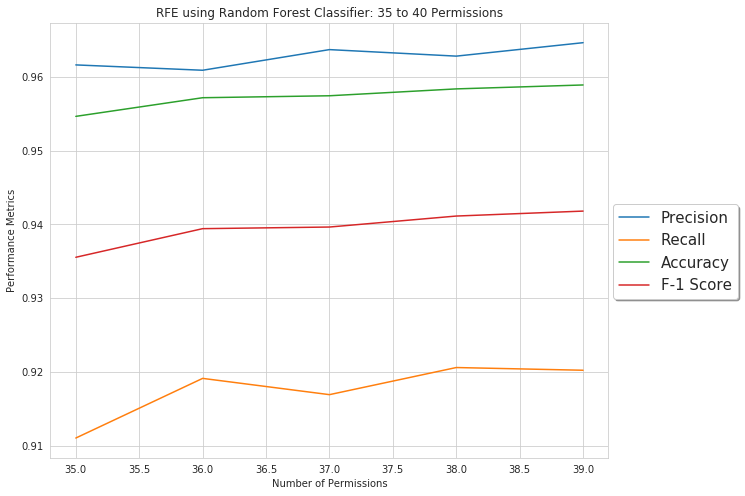

In [38]:
incremental_plot(35,40,title)

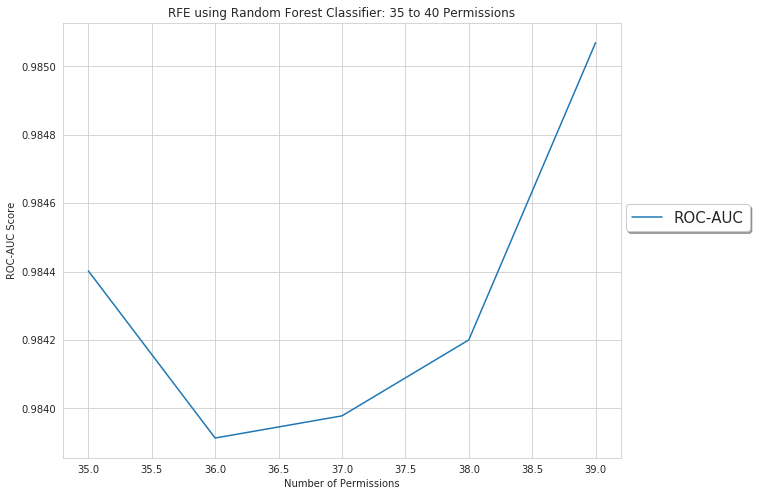

In [39]:
incremental_plot_auc(35,40,title)

In [25]:
clear_metrics()
index = 60

In [27]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_features = sel.transform(X_all)
print(X_optimal_features.shape)

(15036, 60)
CPU times: user 2min 28s, sys: 3.92 s, total: 2min 32s
Wall time: 1min 24s


In [28]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_features,y_all, index)

Classification Report for Random Forest:    60
Accuracy: 0.9870   (+/- 0.0078)
Precision: 0.9893   (+/- 0.0078)
Recall: 0.9755   (+/- 0.0078)
F-1 Score: 0.9823   (+/- 0.0078)
ROC-AUC: 0.9983   (+/- 0.0078)
CPU times: user 47 ms, sys: 52.7 ms, total: 99.7 ms
Wall time: 6.24 s


### Significant Permissions Identification

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_permissions, y_all, test_size = 0.5, random_state = 0)


In [36]:
import time

clear_metrics()
#X_top_feat_imps
for index in range(35,40,1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_transform = sel.transform(X_validate)
    print(X_transform.shape)
    print('Selected Feature: ', index)
    start = time.time()
    run_randomForest(X_transform, y_validate, index)
    end = time.time()
    print(end - start)

(7518, 35)
Selected Feature:  35
Classification Report for Random Forest:    35
Accuracy: 0.9546   (+/- 0.0183)
Precision: 0.9616   (+/- 0.0183)
Recall: 0.9110   (+/- 0.0183)
F-1 Score: 0.9355   (+/- 0.0183)
ROC-AUC: 0.9844   (+/- 0.0183)
3.5134849548339844
(7518, 36)
Selected Feature:  36
Classification Report for Random Forest:    36
Accuracy: 0.9572   (+/- 0.0157)
Precision: 0.9609   (+/- 0.0157)
Recall: 0.9191   (+/- 0.0157)
F-1 Score: 0.9394   (+/- 0.0157)
ROC-AUC: 0.9839   (+/- 0.0157)
3.5991153717041016
(7518, 37)
Selected Feature:  37
Classification Report for Random Forest:    37
Accuracy: 0.9574   (+/- 0.0144)
Precision: 0.9637   (+/- 0.0144)
Recall: 0.9169   (+/- 0.0144)
F-1 Score: 0.9396   (+/- 0.0144)
ROC-AUC: 0.9840   (+/- 0.0144)
3.658693790435791
(7518, 38)
Selected Feature:  38
Classification Report for Random Forest:    38
Accuracy: 0.9584   (+/- 0.0156)
Precision: 0.9628   (+/- 0.0156)
Recall: 0.9206   (+/- 0.0156)
F-1 Score: 0.9411   (+/- 0.0156)
ROC-AUC: 0.9842   (

In [37]:
title = "RFE using Random Forest Classifier: 35 to 40 Permissions"
results_to_csv(title)

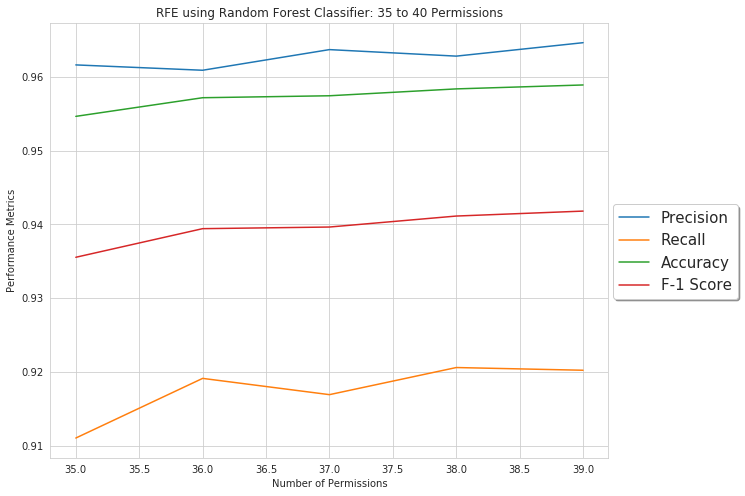

In [38]:
incremental_plot(35,40,title)

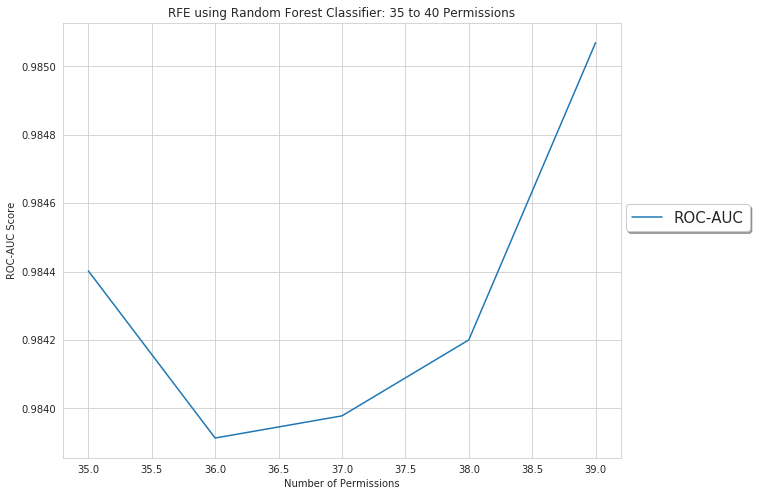

In [39]:
incremental_plot_auc(35,40,title)

In [27]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_permission = sel.transform(X_permissions)
print(X_optimal_permission.shape)

(15036, 36)
CPU times: user 1min 9s, sys: 1.9 s, total: 1min 11s
Wall time: 43 s


In [184]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_permission,y_all, index)

Classification Report for Random Forest:    38
Accuracy: 0.9616   (+/- 0.0081)
Precision: 0.9676   (+/- 0.0081)
Recall: 0.9272   (+/- 0.0081)
F-1 Score: 0.9469   (+/- 0.0081)
ROC-AUC: 0.9886   (+/- 0.0081)
CPU times: user 61.8 ms, sys: 93.2 ms, total: 155 ms
Wall time: 6.49 s


### Significant API Calls Identification

In [16]:
index =32

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_apis, y_all, test_size = 0.5, random_state = 0)


In [20]:
%%time
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, 
                    n_jobs=-1), n_features_to_select=index)
    
sel.fit(X_train,y_train)
X_optimal_apis = sel.transform(X_apis)
print(X_optimal_apis.shape)

(15036, 32)
CPU times: user 27.9 s, sys: 1.11 s, total: 29 s
Wall time: 19 s


In [21]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_apis,y_all, index)

Classification Report for Random Forest:    32
Accuracy: 0.9745   (+/- 0.0068)
Precision: 0.9775   (+/- 0.0068)
Recall: 0.9529   (+/- 0.0068)
F-1 Score: 0.9650   (+/- 0.0068)
ROC-AUC: 0.9939   (+/- 0.0068)
CPU times: user 86.6 ms, sys: 61.3 ms, total: 148 ms
Wall time: 5.9 s


### Combining Significant Permissions and APIs 

In [159]:
X_optimal_permissions_apis = pd.concat([to_dataframe(X_optimal_permission),to_dataframe(X_optimal_apis)], axis = 1) #concatenate column
X_optimal_permissions_apis.shape

(15036, 38)
(15036, 32)


(15036, 70)

In [160]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_optimal_permissions_apis,y_apis, index)

Classification Report for Random Forest:    32
Accuracy: 0.9860   (+/- 0.0077)
Precision: 0.9885   (+/- 0.0077)
Recall: 0.9734   (+/- 0.0077)
F-1 Score: 0.9809   (+/- 0.0077)
ROC-AUC: 0.9982   (+/- 0.0077)
CPU times: user 73.6 ms, sys: 57 ms, total: 131 ms
Wall time: 7.11 s


### Correlation Based Elimination from Combined Significant Permissions and APIS

(15036, 64)


(15036, 64)

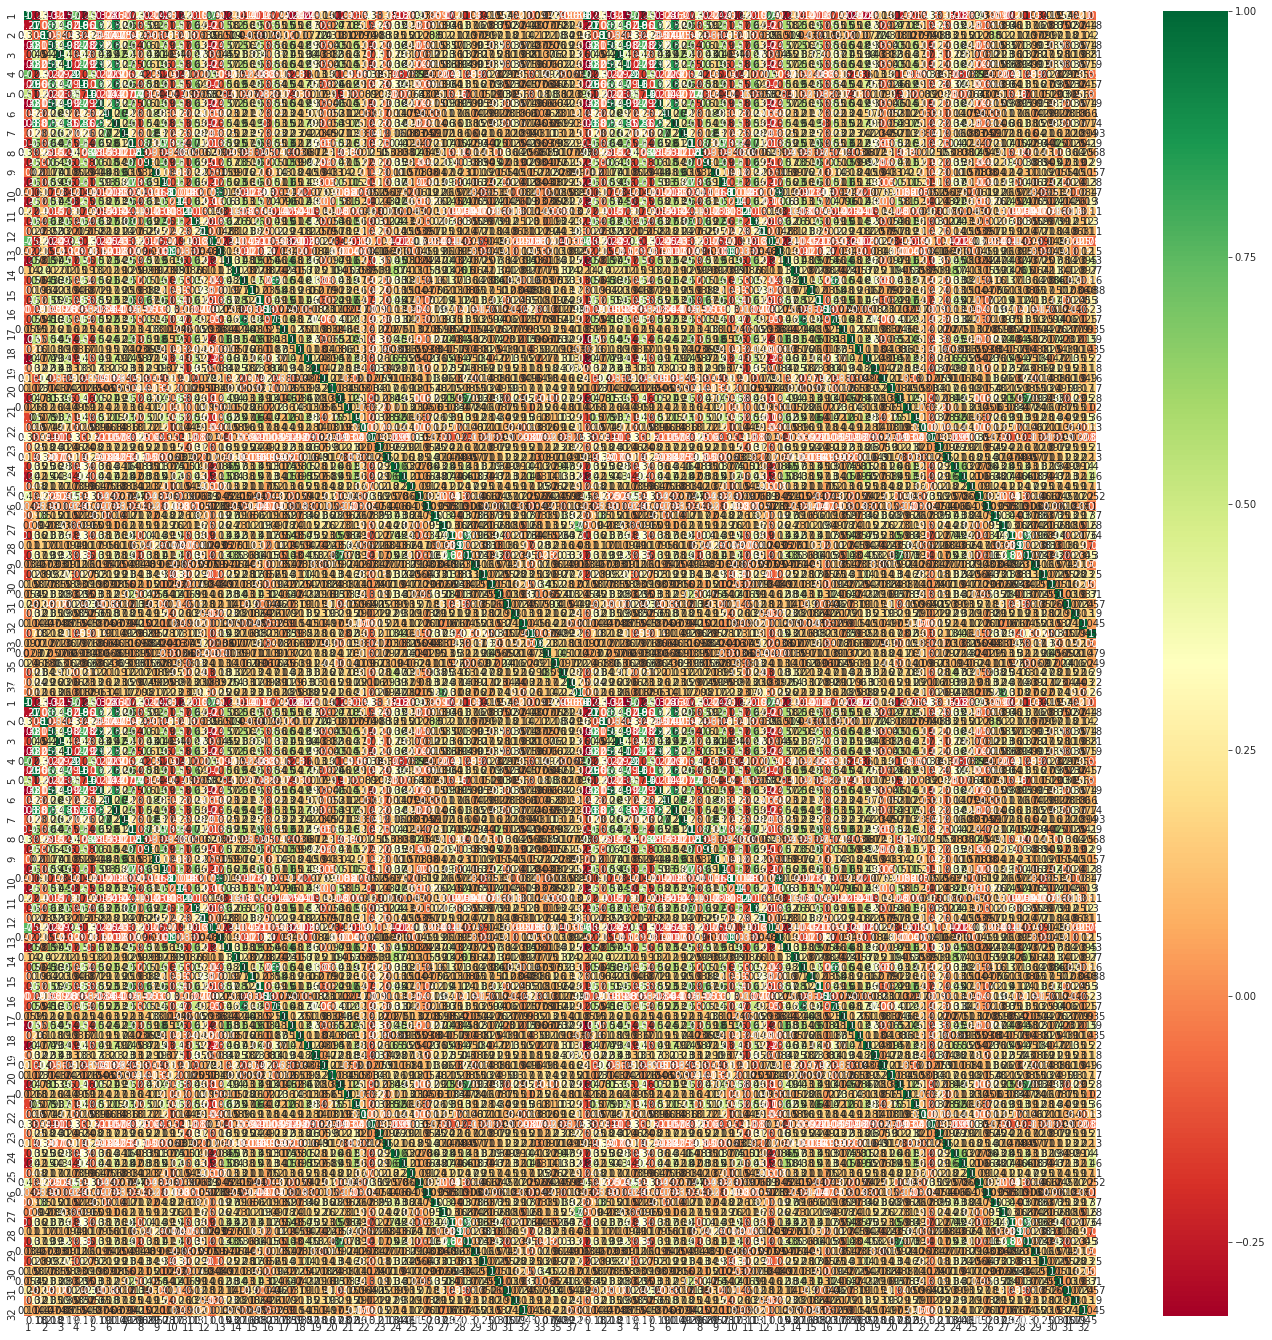

In [165]:
X_corr_optimal = grouped_correlated(X_optimal_permissions_apis)
X_corr_optimal.shape

In [168]:
%%time
#print('Selected Feature: ', index)
run_randomForest(X_corr_optimal,y_all, index)

Classification Report for Random Forest:    32
Accuracy: 0.9862   (+/- 0.0082)
Precision: 0.9889   (+/- 0.0082)
Recall: 0.9736   (+/- 0.0082)
F-1 Score: 0.9811   (+/- 0.0082)
ROC-AUC: 0.9983   (+/- 0.0082)
CPU times: user 86.4 ms, sys: 85.4 ms, total: 172 ms
Wall time: 7.06 s


### List of Significant APIs and Permissions

In [29]:
X_top_features = to_dataframe(X_optimal_features)
X_top_features

(15036, 60)


1   2   3   4   5   6   7   8   9   10  ...  51  52  53  54  55  56  \
1       0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   1   0   
2       0   0   0   0   0   0   1   0   0   0  ...   1   0   0   0   1   0   
3       0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   1   0   
4       0   0   0   0   0   0   0   0   0   1  ...   1   1   1   0   1   1   
5       0   0   0   0   0   0   0   0   0   0  ...   1   0   1   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
15032   1   1   1   1   1   1   0   1   1   1  ...   1   0   0   0   1   0   
15033   0   0   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   
15034   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   
15035   1   1   1   1   1   1   0   1   1   1  ...   1   1   1   0   1   0   
15036   1   1   1   1   1   1   0   1   1   1  ...   1   0   1   0   1   1   

       57  58  59  60  
1       0   0   1   0  
2       0   0   1   0  
3       1   0   0   0  
4       1   1   1   1  
5       1   1   0   1  
...    ..  ..  ..  ..  
15032   1   1   1   0  
15033   1   1   1   0  
15034   0   1   1   0  
15035   1   1   1   1  
15036   1   0   1   1  

[15036 rows x 60 columns]

In [30]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':sel.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
0                            transact        1
35                 System.loadLibrary        1
38                          WRITE_SMS        1
39                 READ_SYNC_SETTINGS        1
41   android.telephony.gsm.SmsManager        1
..                                ...      ...
176                 BIND_TEXT_SERVICE      152
156                     Process.start      153
198                  BIND_VPN_SERVICE      154
124                READ_SOCIAL_STREAM      155
136               WRITE_SOCIAL_STREAM      156

[215 rows x 2 columns]

In [31]:
with open('top_malgenome_features.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['Feature','Ranking'])
        writer.writerows(zip(selected_rfe_features.Feature, selected_rfe_features.Ranking))